In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
sns.set(style='whitegrid')
from IPython.display import Image, display

data_path = '/kaggle/input/books-data/'
file_name = 'books.csv'

In [2]:
df = pd.read_csv(data_path+file_name)
df.head()

user_id      age        isbn  rating    book_title           book_author  \
0        8  34.7439  0002005018       5  Clara Callan  Richard Bruce Wright   
1    11676  34.7439  0002005018       8  Clara Callan  Richard Bruce Wright   
2    67544  30.0000  0002005018       8  Clara Callan  Richard Bruce Wright   
3   116866  34.7439  0002005018       9  Clara Callan  Richard Bruce Wright   
4   123629  34.7439  0002005018       9  Clara Callan  Richard Bruce Wright   

   year_of_publication  \
0               2001.0   
1               2001.0   
2               2001.0   
3               2001.0   
4               2001.0   

                                                                                                            Summary  \
0  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
1  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
2  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
3  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
4  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   

        Category  
0  ['Actresses']  
1  ['Actresses']  
2  ['Actresses']  
3  ['Actresses']  
4  ['Actresses']

In [3]:
df.info() # 데이터 타입 체크
# isbn : international standard book number
# dtype(데이터타입)이 int같지만 obj임 문자열도 포함.
# 이런식으로 info단계에선 처리할거 미리 생각.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383852 entries, 0 to 383851
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              383852 non-null  int64  
 1   age                  383852 non-null  float64
 2   isbn                 383852 non-null  object 
 3   rating               383852 non-null  int64  
 4   book_title           383852 non-null  object 
 5   book_author          383851 non-null  object 
 6   year_of_publication  383852 non-null  float64
 7   Summary              383852 non-null  object 
 8   Category             383852 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 26.4+ MB


In [4]:
df.groupby('Category').size().sort_values(ascending=False)[:10]
# 9는 missing value

Category
9                                152267
['Fiction']                      135429
['Juvenile Fiction']              15062
['Biography & Autobiography']      9437
['Humor']                          3934
['History']                        3354
['Religion']                       2981
['Body, Mind & Spirit']            2169
['Juvenile Nonfiction']            2071
['Social Science']                 2059
dtype: int64

In [5]:
# Preprocessing
# 보통 칼럼에서 대/소문자 시작하는거 소문자로 맞춰주면 편함
df.columns = df.columns.str.lower() # 컬럼명 소문자 처리
df['rating'] = df['rating'].astype(float) # 나머지들이 float이라 맞춰줌, int로 해도 무방
df['age_range'] = (df['age']/10).astype(int)*10 # 십의 자리수로 연령대 변환
df['category'] = df['category'].replace("9", np.nan) # null 로 변환
df['category'] = df['category'].str.replace("['", "").str.replace("']", "") # 불필요한 문자 제거
df['summary'] = df['summary'].replace("9", np.nan) # null 로 변환

In [6]:
print(df.shape)
print(df.user_id.nunique()) # the number of unique users
print(df.isbn.nunique()) # the number of unique items

(383852, 10)
68092
149842


In [7]:
# 메타데이터
# ISBN 별로 groupby 이후에 평점 평균, 리뷰 갯수 등 통계 만들기
# 이 데이터프레임을 추후에 여러 목적으로 활용(추천결과 확인, Popularity-based 추천)
book_info = df[['isbn', 'book_title', 'year_of_publication', 'book_author', 'category']].drop_duplicates()
book_info_rating = df.groupby(['isbn']).agg(rating_mean=('rating','mean'), rating_count=('rating','count'))
book_info = book_info.merge(book_info_rating, on='isbn').sort_values('rating_count', ascending = False)
book_info.head(10)

isbn  \
203   0316666343   
22    0971880107   
1017  0385504209   
701   0312195516   
1358  0060928336   
2633  059035342X   
307   0142001740   
957   0446672211   
233   044023722X   
248   0452282152   

                                                            book_title  \
203                                          The Lovely Bones: A Novel   
22                                                         Wild Animus   
1017                                                 The Da Vinci Code   
701                                The Red Tent (Bestselling Backlist)   
1358                   Divine Secrets of the Ya-Ya Sisterhood: A Novel   
2633  Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))   
307                                            The Secret Life of Bees   
957                 Where the Heart Is (Oprah's Book Club (Paperback))   
233                                                    A Painted House   
248                                          Girl with a Pearl Earring   

      year_of_publication      book_author          category  rating_mean  \
203                2002.0     Alice Sebold               NaN     8.185290   
22                 2004.0     Rich Shapero           Fiction     4.390706   
1017               2003.0        Dan Brown           Fiction     8.435318   
701                1998.0    Anita Diamant           Fiction     8.182768   
1358               1997.0    Rebecca Wells           Fiction     7.887500   
2633               1999.0    J. K. Rowling  Juvenile Fiction     8.939297   
307                2003.0    Sue Monk Kidd           Fiction     8.452769   
957                1998.0     Billie Letts               NaN     8.142373   
233                2001.0     John Grisham           Fiction     7.338078   
248                2001.0  Tracy Chevalier           Fiction     7.982014   

      rating_count  
203            707  
22             581  
1017           487  
701            383  
1358           320  
2633           313  
307            307  
957            295  
233            281  
248            278

In [8]:
print(book_info.shape)
print(book_info.isbn.nunique())
print(book_info.book_author.nunique())
print(book_info.category.nunique())

(149842, 7)
149842
62115
4295


In [9]:
book_info.isnull().sum()

isbn                       0
book_title                 0
year_of_publication        0
book_author                1
category               68990
rating_mean                0
rating_count               0
dtype: int64

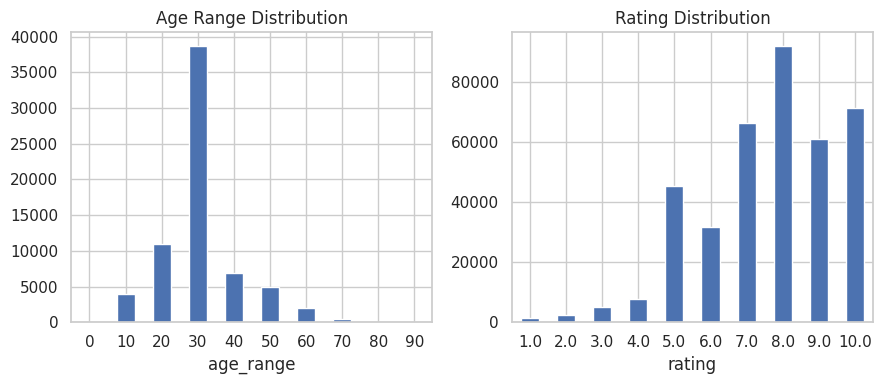

In [10]:
# 1 row and 2 columns subplot
fig, axes = plt.subplots(1,2, figsize=(9,4))

# 유저의 연령대별 빈도수 분포
df[['user_id', 'age_range']].drop_duplicates()['age_range'].value_counts().sort_index().plot(kind='bar',rot=0, ax=axes[0])
axes[0].set_title('Age Range Distribution')

# 유저가 남긴 평점들의 분포
df['rating'].value_counts().sort_index().plot(kind='bar', rot=0, ax=axes[1])
axes[1].set_title('Rating Distribution')

plt.tight_layout()
plt.show()

- note
  - 30대 리뷰어가 대부분이며, 평점은 주로 8점 근처에 수렴
  - 단순 카운트와 유저당 어떤 통계를 내서 비교하는 것은 의미상 차이가 존재
  - 유저당 통계는 단순 카운트와 달리 유저라는 분석 단위를 설정하고 분석하는 방법며, 좀더 안정적인 통계를 산출하는 경향

In [11]:
df['rating'].describe()

count    383852.000000
mean          7.626710
std           1.841331
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: rating, dtype: float64

In [12]:
df.head()

user_id      age        isbn  rating    book_title           book_author  \
0        8  34.7439  0002005018     5.0  Clara Callan  Richard Bruce Wright   
1    11676  34.7439  0002005018     8.0  Clara Callan  Richard Bruce Wright   
2    67544  30.0000  0002005018     8.0  Clara Callan  Richard Bruce Wright   
3   116866  34.7439  0002005018     9.0  Clara Callan  Richard Bruce Wright   
4   123629  34.7439  0002005018     9.0  Clara Callan  Richard Bruce Wright   

   year_of_publication  \
0               2001.0   
1               2001.0   
2               2001.0   
3               2001.0   
4               2001.0   

                                                                                                            summary  \
0  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
1  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
2  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
3  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
4  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   

    category  age_range  
0  Actresses         30  
1  Actresses         30  
2  Actresses         30  
3  Actresses         30  
4  Actresses         30

In [13]:
# 분석단위 : 유저별, 68092명으로 변환
df.groupby('user_id')['rating'].mean().describe()

count    68092.000000
mean         7.487156
std          1.618264
min          1.000000
25%          6.666667
50%          7.769673
75%          8.500000
max         10.000000
Name: rating, dtype: float64

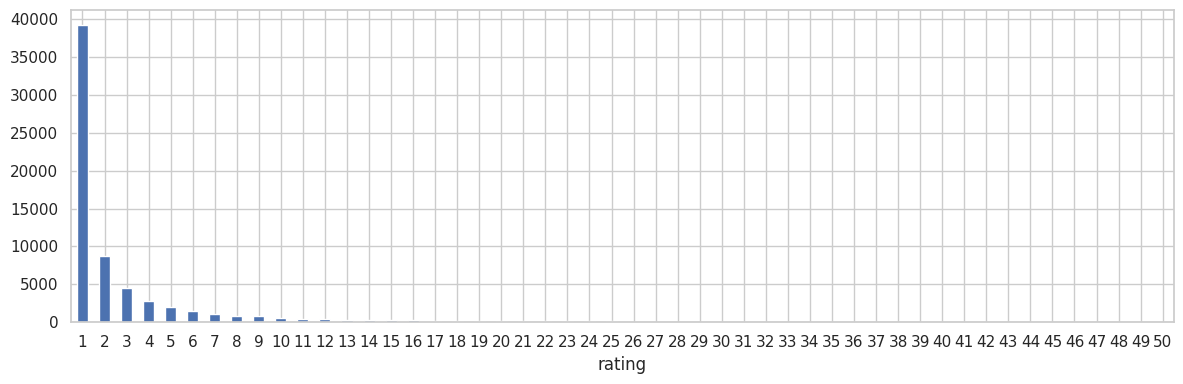

In [14]:
# 유저당 남긴 리뷰수의 분포
df.groupby('user_id')['rating'].size().value_counts().sort_index()[:50].plot(kind='bar',figsize=(12,4),rot = 0)
plt.tight_layout()

# 유저당 보통 리뷰(rating) 한개 남긴다.

In [15]:
df.groupby('user_id')['rating'].size().value_counts().sort_index()

rating
1       39224
2        8674
3        4575
4        2832
5        2003
        ...  
1180        1
1845        1
1899        1
5691        1
6943        1
Name: count, Length: 289, dtype: int64

In [16]:
df.groupby('user_id')['rating'].size().value_counts().sort_index().tail(30)
# 어떤 케이스는 평점 6943번 남긴 기록도 있음.. outlier
# 그냥 포함시켜서 go

rating
475     1
476     1
478     1
479     1
482     1
484     1
487     1
498     1
499     1
502     1
504     1
524     1
563     1
567     1
603     1
606     1
698     1
777     1
781     1
838     1
941     1
959     1
962     1
1012    1
1020    1
1180    1
1845    1
1899    1
5691    1
6943    1
Name: count, dtype: int64

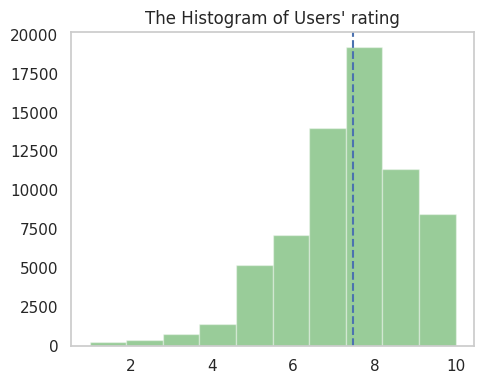

In [17]:
df.groupby('user_id')['rating'].mean().hist(bins=10, figsize=(5,4), color = 'green', alpha = .4) # alpha 0~1 막대 진하기

plt.title("The Histogram of Users' rating")
plt.axvline(x=7.487156, color = 'b', linestyle='--') # mean : 7.487156
plt.grid() # 뒤에 격자 없애기
plt.tight_layout()

In [18]:
# top 10 books and Authors
top_books = df['book_title'].value_counts()[:10]
top_authors = df['book_author'].value_counts()[:10] # 높은평점이 아니라, 평을 많이 받은 책
top_cate = df['category'].value_counts().head(10)

In [19]:
top_books

book_title
The Lovely Bones: A Novel                           707
Wild Animus                                         581
The Da Vinci Code                                   494
The Secret Life of Bees                             406
The Nanny Diaries: A Novel                          393
The Red Tent (Bestselling Backlist)                 383
Bridget Jones's Diary                               377
A Painted House                                     366
Life of Pi                                          336
Harry Potter and the Chamber of Secrets (Book 2)    326
Name: count, dtype: int64

In [20]:
top_authors

book_author
Stephen King          4639
Nora Roberts          2938
John Grisham          2550
James Patterson       2387
J. K. Rowling         1746
Mary Higgins Clark    1677
Janet Evanovich       1490
Dean R. Koontz        1475
Anne Rice             1245
Sue Grafton           1235
Name: count, dtype: int64

In [21]:
top_cate

category
Fiction                      135429
Juvenile Fiction              15062
Biography & Autobiography      9437
Humor                          3934
History                        3354
Religion                       2981
Body, Mind & Spirit            2169
Juvenile Nonfiction            2071
Social Science                 2059
Business & Economics           1902
Name: count, dtype: int64

Basic Model of Recommender System
- Collaborative Filtering
  - Memory-based : 유저 정보와 아이템정보 사용
 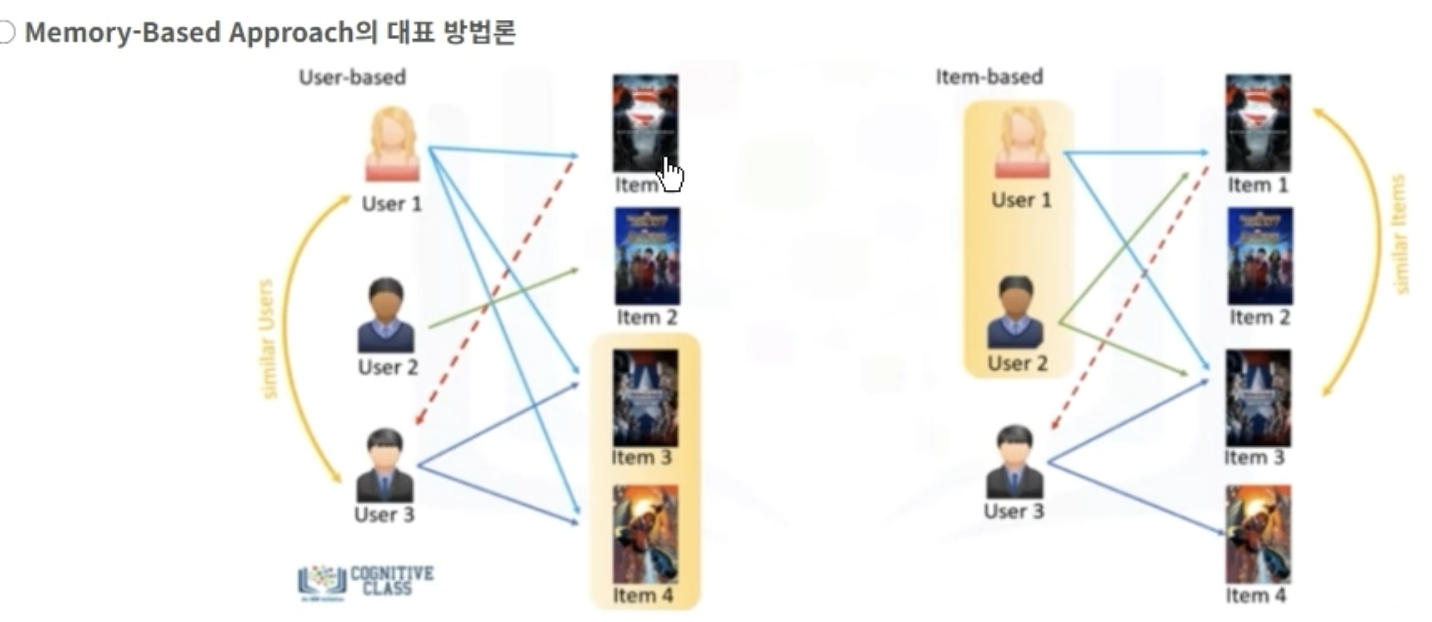
    
  - Model-based : 머신러닝 등 모델을 이용

- Contents-based :
- Hybrid and Ensemble-based : 여러개 섞음. 앙상

시간, 위치, 문맥 이해해야함.
ex) 밤엔 유튜브에서 자장가 많이 봄

오프라인 지표 : 주로 배포전 의사결정(어떤모델)을 하기위해 활용하고, 실제 사용자 피드백을 사전 예측하기 위해 이용 
평점예측기반 평가지표 regression 기반 성능지표 예측값과 실제값의 차이 RMSE, MAE
랭킹예측기반 평가지표

온라인 지표 : 실제 서비스 배포후 CTR(Click Through Rate), PV(Page View), 매출 등 비즈니스 지표에 미친 영향도 측정
- AB테스트로 지속적으로 추천알고리즘 개선

MLOPS 지표 : 실제 서비스 운영할때 중요함. 피처퀄리티, 데이터양(사이즈), cpu/ram/gpu 리소스 및 파이프라인 현황. 이상치 탐지 등 알고리즘이 적용, 알람 시스템을 통해 사전에 장애 및 이슈를 대응하기 위함.
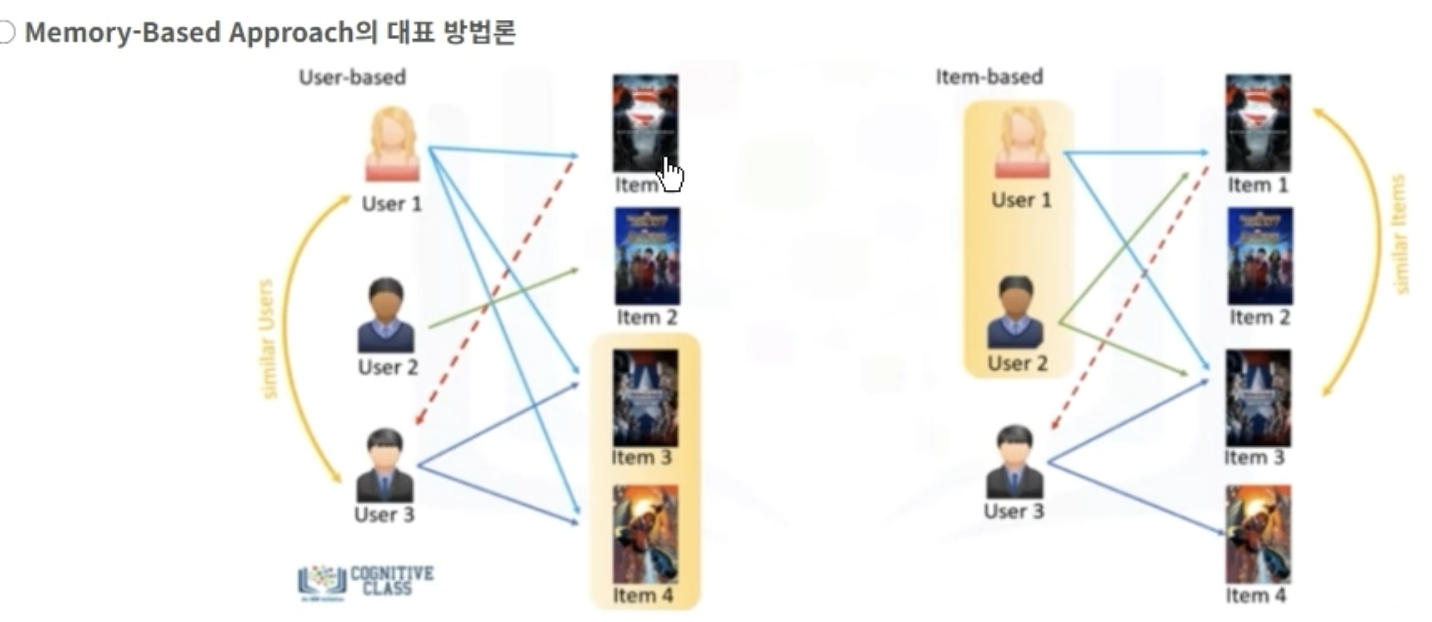
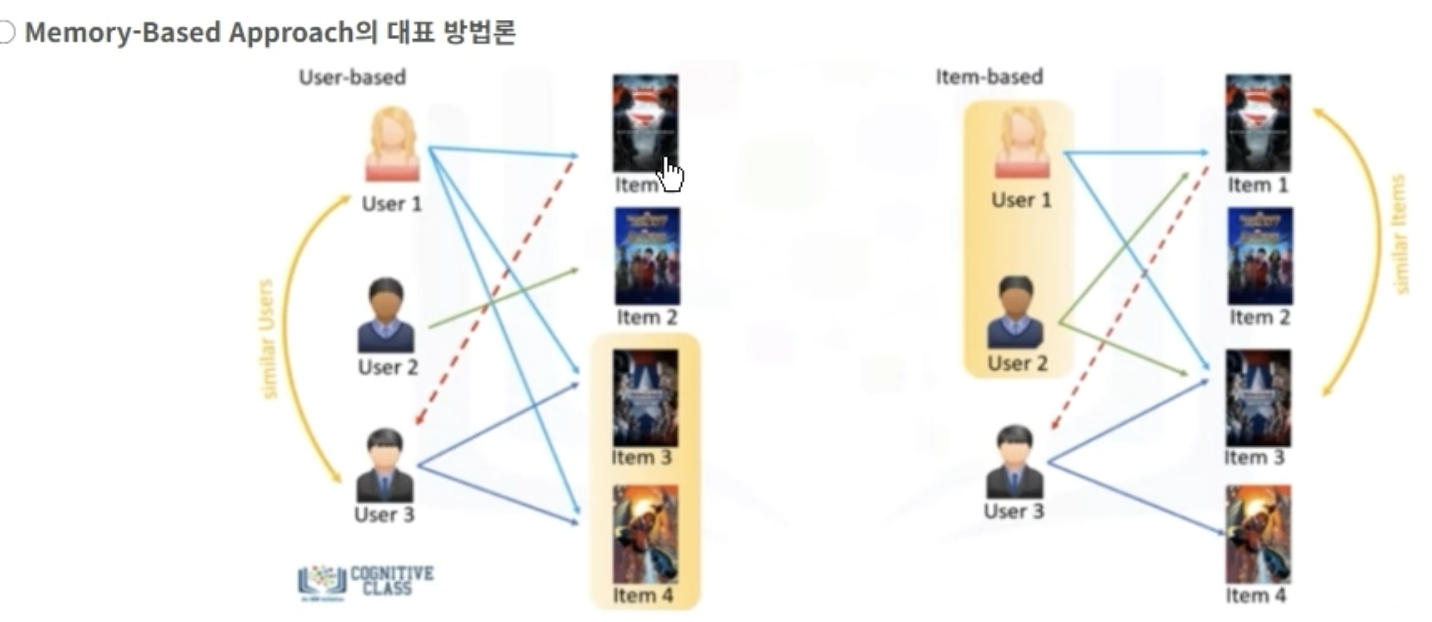

# Collaborative Filtering

## Memory-based
- KNN Basic : 유사한 사용자들의 평가를 바탕. 각 사용자와의 유사도를 고려하여 가중 평균을 계산하여 새로운 평점을 예측. 단순함
- 즉 유사한 이웃을 찾아서 해당 이웃이 기존에 부여한 평점의 평균을 구하는데, 유사도를 가중치를 이용하여 평균을 구한다.
- 유저간 유사도뿐만 아니라 아이템간 유사도도 가능함.
- 초반에 가볍게 시작하기 좋음. 메타정보나 피쳐 필요없이 단순한 아이템정보나 유저정보 그리고 rating정보만 있으면.
- 단 새로운 아이템or유저 추천 어려움(Cold-start), 데이터 희소성이 높으면 추천퀄리티가 안좋음. 사용자 수가 증가하면 연산량이 급격히 증가한다.

## Model-based
- Matrix Factorization : 행렬의 차원을 축소하여 예측하는 방법. 차원축소에선 주로 SVD(행렬분해 기법)이용. 만약 rating이 명시되어 있지 않고 내재적이면 SVD++(SVDpp)이용
- 차원축소 : 정보 손실량을 최소로하면서 차원의 수를 줄인다.


In [22]:
df_mf = df[['user_id','isbn','rating']].drop_duplicates() # 중복제거. 변수는 이것만 필요. simple
df_mf.head()

user_id        isbn  rating
0        8  0002005018     5.0
1    11676  0002005018     8.0
2    67544  0002005018     8.0
3   116866  0002005018     9.0
4   123629  0002005018     9.0

In [23]:
# 30번 이상 rating한 유저만 필터링 -> 추천시스템 핵심 타깃으로 정의
# 30번 미만 유저의 경우 다른 approach 이용 -> 의사결정 방안
user_list = df_mf.groupby('user_id').size().reset_index()
user_list.columns = ['user_id','review_cnt']
user_list = user_list[user_list['review_cnt']>=30]

df_mf = df_mf[df_mf['user_id'].isin(user_list.user_id)]

In [24]:
df_mf.head()

user_id        isbn  rating
1     11676  0002005018     8.0
3    116866  0002005018     9.0
7    219008  0002005018     7.0
8    263325  0002005018     6.0
11    35704  0374157065     6.0

In [25]:
print(df_mf.shape)
print(df_mf.user_id.nunique())
print(df_mf.isbn.nunique()) # 책 고개수
print(book_info.isbn.nunique()) # 책 메타정보

(189993, 3)
2140
99531
149842


In [26]:
# Calculate sparsity - 희소성 계산
df_sparsity = df_mf.groupby(['user_id','isbn']).agg({'rating':'count'}).reset_index()
user_item_matrix = df_sparsity.pivot(index='user_id', columns='isbn',values='rating')
user_item_matrix
# 딱 봐도 sparsity가 높다... NaN..
# 행의 개수, 열의 개수 각각 차원을 차지하고있음 ->svd로 차원을 낮추자

isbn     0000913154  0001046438  000104687X  0001047213  0001047973  \
user_id                                                               
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         NaN   
638             NaN         NaN         NaN         NaN         NaN   
643             NaN         NaN         NaN         NaN         NaN   
882             NaN         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
278188          NaN         NaN         NaN         NaN         NaN   
278356          NaN         NaN         NaN         NaN         NaN   
278418          NaN         NaN         NaN         NaN         NaN   
278582          NaN         NaN         NaN         NaN         NaN   
278633          NaN         NaN         NaN         NaN         NaN   

isbn     000104799X  0001048082  0001053736  0001053744  0001055607  ...  \
user_id                                                              ...   
254             NaN         NaN         NaN         NaN         NaN  ...   
507             NaN         NaN         NaN         NaN         NaN  ...   
638             NaN         NaN         NaN         NaN         NaN  ...   
643             NaN         NaN         NaN         NaN         NaN  ...   
882             NaN         NaN         NaN         NaN         NaN  ...   
...             ...         ...         ...         ...         ...  ...   
278188          NaN         NaN         NaN         NaN         NaN  ...   
278356          NaN         NaN         NaN         NaN         NaN  ...   
278418          NaN         NaN         NaN         NaN         NaN  ...   
278582          NaN         NaN         NaN         NaN         NaN  ...   
278633          NaN         NaN         NaN         NaN         NaN  ...   

isbn     B0000T6KIM  B0000VZEH8  B0000VZEJQ  B0000X8HIE  B00011SOXI  \
user_id                                                               
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         NaN   
638             NaN         NaN         NaN         NaN         NaN   
643             NaN         NaN         NaN         NaN         NaN   
882             NaN         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
278188          NaN         NaN         NaN         NaN         NaN   
278356          NaN         NaN         NaN         NaN         NaN   
278418          NaN         NaN         NaN         NaN         NaN   
278582          NaN         NaN         NaN         NaN         NaN   
278633          NaN         NaN         NaN         NaN         NaN   

isbn     B00013AX9E  B0001FZGRQ  B0001GMSV2  B0001I1KOG  B000234N3A  
user_id                                                              
254             NaN         NaN         NaN         NaN         NaN  
507             NaN         NaN         NaN         NaN         NaN  
638             NaN         NaN         NaN         NaN         NaN  
643             NaN         NaN         NaN         NaN         NaN  
882             NaN         NaN         NaN         NaN         NaN  
...             ...         ...         ...         ...         ...  
278188          NaN         NaN         NaN         NaN         NaN  
278356          NaN         NaN         NaN         NaN         NaN  
278418          NaN         NaN         NaN         NaN         NaN  
278582          NaN         NaN         NaN         NaN         NaN  
278633          NaN         NaN         NaN         NaN         NaN  

[2140 rows x 99531 columns]

In [27]:
non_zero_count = user_item_matrix.count().sum() # count()는 Na 미포함
total_entries = user_item_matrix.size
sparsity = 1-(non_zero_count / total_entries)

print(f'Interaction size : {non_zero_count}')
print(f'Matrix total size : {total_entries}')
print(f'sparsity of the matrix : {sparsity:.2%}') # 대부분의 케이스에서도 비어있

Interaction size : 189993
Matrix total size : 212996340
sparsity of the matrix : 99.91%


In [28]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from surprise import SVD, SVDpp, NMF, KNNBasic, KNNBaseline, accuracy # 알고리즘들
from sklearn.model_selection import StratifiedShuffleSplit # 계층샘플링, 특정 그룹내에서 비율을 유지하며 샘플링함
from sklearn.feature_extraction.text import TfidfVectorizer # summary에서 텍스트 처

아래와 같이 한 유저가 여러개의 데이터가 있을시 train과 test 전부 들어가야하기 때문 StratifiedShuffleSplit이 필요함
또한 Generator라서 for문으로 직접 해야함.
반대로 train_test_split은 단순 함수 호출이라 바로 데이터를 나눠준다.

df_mf.sort_values('user_id').head(10)

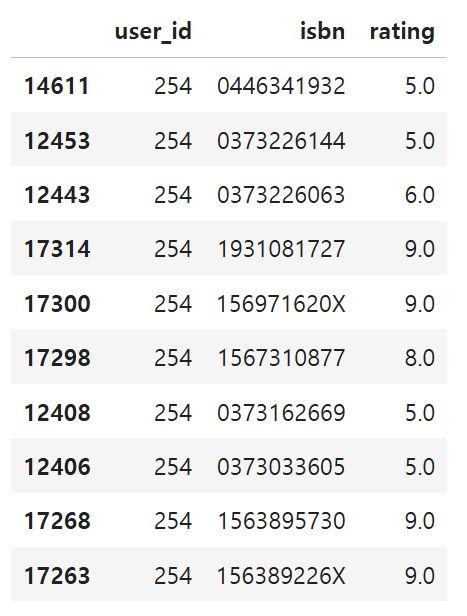서89226X	9.0

In [29]:
# 보통 train/test 나눌땐 n_split = 1 -> 한번만 나눈다
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.3, random_state=42)
for train_idx, test_idx in split.split(df_mf, df_mf['user_id']): # for train_idx, test_idx in split.split(데이터프레임, 데이터프레임의 계층적 분할 기준)
    strat_train_set = df_mf.iloc[train_idx] # use iloc for positional indexing
    strat_test_set = df_mf.iloc[test_idx] # strat는 stratified의 줄임말

In [30]:
# 모든 유저가 똑같이 나눴기때문에 같은 수가 나옴. 만약 그냥 train_test_split을 했다면 값이 다르게 나온다.
# 각 계층의 분포를 유지하면서 데이터를 나누기 때문
print(strat_train_set.user_id.nunique())
print(strat_test_set.user_id.nunique())

2140
2140


In [31]:
# user 254은 train/test 각각 40 / 17
# user 507은 train/test 각각 26 / 11...
print(strat_train_set.groupby('user_id').size(),'\n')
print(strat_test_set.groupby('user_id').size())

user_id
254       40
507       26
638       38
643       31
882       28
          ..
278188    36
278356    25
278418    74
278582    25
278633    30
Length: 2140, dtype: int64 

user_id
254       17
507       11
638       16
643       13
882       12
          ..
278188    16
278356    11
278418    32
278582    11
278633    13
Length: 2140, dtype: int64


In [32]:
# Define a Reader object
min_scale = strat_train_set['rating'].min()
max_scale = strat_train_set['rating'].max()

# surprise 라이브러리에서 꼭 쓴다. 데이터를 인지하는 객체
# rating_scale 매개변수를 통해 평점의 최소값과 최대값을 설정하여 추천 시스템이 데이터를 어떻게 처리할지를 결정
reader = Reader(rating_scale=(min_scale, max_scale))

# Split data into training and test sets

#strat_train_set과 Reader 객체를 사용하여 surprise에서 사용할 수 있는 데이터셋 객체를 만든다. 이 객체는 추천 알고리즘이 이해할 수 있는 형식으로 데이터를 변환
train_data = Dataset.load_from_df(strat_train_set, reader)

# 완전한 훈련 세트로 변환. 이는 추천 알고리즘이 학습할 수 있도록 모든 데이터를 포함하는 데이터 구조를 만든다.
trainset = train_data.build_full_trainset() # train을 하라. 피팅하기.

# 앞 두개의 값만 주고 rating맞춰보기 test
testset = [tuple(x) for x in strat_test_set.values]

In [33]:
# Define a list of algorithms to test
algorithms = [
    SVD(), # 행렬분해기
    #KNNBasic(sim_options={'name':'cosine', 'user_based':False}) # item base가 됨
    KNNBasic(sim_options={'name':'cosine', 'user_based':True}), # simularity option. 코사인 벡터 사이
    KNNBaseline(sim_options={'name':'cosine', 'user_basead':True}),
    NMF(), # 네거티브를 사용하지 않는 알고리즘
    #SVDpp() # 암묵적인 피드백을 쓸때
]

def evaluate_model(model, trainset, testset):
    model.fit(trainset)
    predictions = model.test(testset)
    rmse = accuracy.rmse(predictions, verbose = False) # 자세한 결과 알고프면 verbose = True
    mae = accuracy.mae(predictions, verbose = False)
    return rmse, mae # 낮을수록 예측이 좋다.

In [34]:
# Initialize a list to store results
results = []

# Loop through each algorithm and evaluate
for algorithm in algorithms:
    rmse, mae = evaluate_model(algorithm, trainset, testset) # train,test는 고정값

    # log
    print(f'{algorithm.__class__.__name__} Model Evaluation:') # algorithm.__class__.__name__은 현재 사용 중인 추천 알고리즘의 이름을 문자열로 가져옴
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print('-' * 30)

    results.append({
        'Algorithm': algorithm.__class__.__name__,
        'RMSE': rmse,
        'MAE': mae
})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

SVD Model Evaluation:
RMSE: 1.5461
MAE: 1.1705
------------------------------
Computing the cosine similarity matrix...
Done computing similarity matrix.
KNNBasic Model Evaluation:
RMSE: 1.9509
MAE: 1.5316
------------------------------
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
KNNBaseline Model Evaluation:
RMSE: 1.6601
MAE: 1.2520
------------------------------
NMF Model Evaluation:
RMSE: 2.4491
MAE: 2.0350
------------------------------


In [35]:
results_df[['RMSE','MAE']] = results_df[['RMSE','MAE']].round(2)
results_df

Algorithm  RMSE   MAE
0          SVD  1.55  1.17
1     KNNBasic  1.95  1.53
2  KNNBaseline  1.66  1.25
3          NMF  2.45  2.04

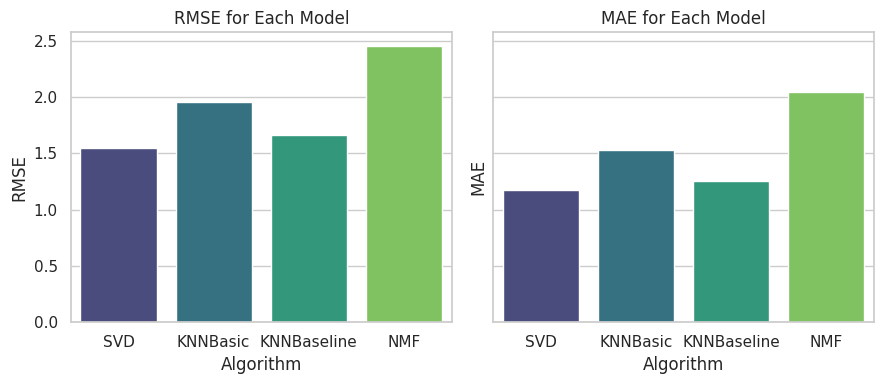

In [36]:
# Set the style of the visualization
sns.set(style='whitegrid')

# Create subplots
# subplots(행의개수, 열의개수, sharey = y축을 공유할지 여부)
# fig는 전체 Figure 객체. 전체적인 레이아웃이나 크기 등을 설정
# axes는 각 서브플롯에 대한 설정을 할 수 있습
fig, axes = plt.subplots(1,2, figsize=(9,4), sharey=True)

# Bar plot for RMSE -> axes[0]
sns.barplot(x='Algorithm', y='RMSE', data=results_df, palette='viridis',ax=axes[0])
axes[0].set_title('RMSE for Each Model')
# axes[0].tick_params(axis='x', rotation=10)

# Bar plot for MAE -> axes[1]
sns.barplot(x='Algorithm', y='MAE', data=results_df, palette='viridis',ax=axes[1])
axes[1].set_title('MAE for Each Model')

# Adjust layout
plt.tight_layout()
plt.show()

# 에러이기때문에 수치가 낮아야 좋다.
# 순서를 고려하지 않는다. 오직 실제값가 예측값의 갭만 본다
# 반면에 precision, recall은 순서도 어느정도 고려한다.

In [37]:
# Precision, Recall / SVD모델로 한번 해보자
# 이미 위에서 한번 했지만 한번더 알아두자
min_scale = strat_train_set['rating'].min()
max_scale = strat_train_set['rating'].max()
reader = Reader(rating_scale = (min_scale, max_scale))

train_data = Dataset.load_from_df(strat_train_set, reader)
trainset = train_data.build_full_trainset()
testset = [tuple(x) for x in strat_test_set.values]

# Fit model and make predictions
model = SVD()
model.fit(train_data.build_full_trainset())
predictions = model.test(testset)

In [38]:
for x in predictions[:10]:
    print(x)

#r_ui = 6.00 실제값과  est = 7.32 예측값의 차이로 rmse, mae를 구할수있다.

user: 131032     item: 0671864769 r_ui = 6.00   est = 7.02   {'was_impossible': False}
user: 251394     item: 0425038262 r_ui = 8.00   est = 7.76   {'was_impossible': False}
user: 100906     item: 2211063276 r_ui = 10.00   est = 8.22   {'was_impossible': False}
user: 137688     item: 0571191797 r_ui = 6.00   est = 8.28   {'was_impossible': False}
user: 27875      item: 0316037451 r_ui = 8.00   est = 8.16   {'was_impossible': False}
user: 204864     item: 0449902692 r_ui = 10.00   est = 8.67   {'was_impossible': False}
user: 138995     item: 0345339738 r_ui = 9.00   est = 10.00   {'was_impossible': False}
user: 101851     item: 1560764309 r_ui = 9.00   est = 8.44   {'was_impossible': False}
user: 14521      item: 068416325X r_ui = 10.00   est = 7.81   {'was_impossible': False}
user: 223566     item: 0385335881 r_ui = 8.00   est = 7.68   {'was_impossible': False}


In [39]:
# SVD모델 Precision, Recall check def
top_k = 5 # 1~5개의 추천된 포지션만 이용(선호도 순)
threshold = 7 # 실제값 7점(r_ui) 이상만 유의미한걸로 보겠다.

predictions_df = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'true_rating', 'est_rating', 'details'])
predictions_df = predictions_df[['user_id', 'isbn', 'true_rating', 'est_rating']] # 필요한것만 들고오기

# user별 est_rating 높은순으로 정렬
predictions_df['pred_rank'] = predictions_df.groupby('user_id')['est_rating'].rank(method='first', ascending=False)
predictions_df['true_rank'] = predictions_df.groupby('user_id')['true_rating'].rank(method='first', ascending=False)
predictions_df['is_relevant'] = predictions_df['true_rank'] <= top_k

predicted_top_k = predictions_df[predictions_df['pred_rank'] <= top_k]
precision_per_user = predicted_top_k.groupby('user_id')['is_relevant'].sum() # 선호도5등 안에꺼 sum

# predictions_df[predictions_df['true_rating']>=threshold].groupby('user_id').size()
total_relevant_items = predictions_df.query("true_rating >= @threshold").groupby("user_id").size() # pandas의 query() 메서드에서 외부 변수를 참조할 때

precision_at_k = precision_per_user / top_k # 예측한 것 중에 실제로 몇개를 맞췄는
recall_at_k = precision_per_user / total_relevant_items # 실제중 몇개를 정확히 예측했는지

print(precision_at_k.mean(), recall_at_k.mean())

0.3814018691588785 0.20437582632163226


In [40]:
# Define models to test repeatdly
model_classes = {
    'SVD' : SVD(),
    'KNNBasic' : KNNBasic(sim_options={'name':'cosine', 'user_based':True}),
    'KNNBaseline' : KNNBaseline(sim_options={'name':'cosine', 'user_based':True}),
    'NMF': NMF(),
}

In [41]:
# 위의 precision, recall 함수화
def get_precision_recall(predictions, top_n, threshold):
    '''
    predictions : precision 결과 데이터프레임
    top_n : 1~n개의 추천된 포지션만 이용(선호도 순)
    threshold : 실제값 threshold점(r_ui) 이상만 유의미한걸로 보겠다.
    '''
    # Precision, Recall check def
    top_k = top_n # 1~5개의 추천된 포지션만 이용(선호도 순)
    
    predictions_df = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'true_rating', 'est_rating', 'details'])
    predictions_df = predictions_df[['user_id', 'isbn', 'true_rating', 'est_rating']] # 필요한것만 들고오기
    
    # user별 est_rating 높은순으로 정렬
    predictions_df['pred_rank'] = predictions_df.groupby('user_id')['est_rating'].rank(method='first', ascending=False)
    predictions_df['true_rank'] = predictions_df.groupby('user_id')['true_rating'].rank(method='first', ascending=False)
    predictions_df['is_relevant'] = predictions_df['true_rank'] <= top_k
    
    predicted_top_k = predictions_df[predictions_df['pred_rank'] <= top_k]
    precision_per_user = predicted_top_k.groupby('user_id')['is_relevant'].sum() # 선호도5등 안에꺼 sum
    
    # predictions_df[predictions_df['true_rating']>=threshold].groupby('user_id').size()
    total_relevant_items = predictions_df.query("true_rating >= @threshold").groupby("user_id").size() # pandas의 query() 메서드에서 외부 변수를 참조할 때
    
    precision_at_k = precision_per_user / top_k # 예측한 것 중에 실제로 몇개를 맞췄는
    recall_at_k = precision_per_user / total_relevant_items # 실제중 몇개를 정확히 예측했는지
    
    return precision_at_k.mean(), recall_at_k.mean()

In [42]:
# Dictionary to store models and their predictions
models_predictions = {}

# Evaluate models and get hit ratios
top_n_values = [1,2,3,4,5,6,7] # 여러가지 top_n으로 해본다. 비즈니스적으로 정하기도
precision_results = []
recall_results = []
for model_name, model in model_classes.items():
    print(f"Evaluating {model_name}...")

    # Prepare training data
    train_data = Dataset.load_from_df(strat_train_set[['user_id','isbn','rating']], reader)
    trainset = train_data.build_full_trainset()
    testset = [tuple(x) for x in strat_test_set[['user_id','isbn','rating']].values]

    # Fit model and make predictions
    model.fit(train_data.build_full_trainset())
    predictions = model.test(testset)

    # Save the trained model and predictions to the dictionary
    models_predictions[model_name] = {
        'model' : model,
        'predictions' : predictions
    }

    # Get precision for different Top-N values
    for top_n in top_n_values:
        precision, recall = get_precision_recall(predictions, top_n, 7)
        precision_results.append({'model':model_name, 'topk':top_n,'precision':precision})
        recall_results.append({'model':model_name, 'topk':top_n, 'recall':recall})

Evaluating SVD...
Evaluating KNNBasic...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating KNNBaseline...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating NMF...


In [43]:
precision_results=pd.DataFrame(precision_results)
precision_results.head(10)

model  topk  precision
0       SVD     1   0.111682
1       SVD     2   0.191589
2       SVD     3   0.256542
3       SVD     4   0.317991
4       SVD     5   0.378411
5       SVD     6   0.436371
6       SVD     7   0.487850
7  KNNBasic     1   0.110748
8  KNNBasic     2   0.192523
9  KNNBasic     3   0.263863

In [44]:
precision_results.pivot_table(index='model', columns='topk', values='precision').round(3)

topk             1      2      3      4      5      6      7
model                                                       
KNNBaseline  0.107  0.184  0.256  0.317  0.377  0.438  0.494
KNNBasic     0.111  0.193  0.264  0.325  0.384  0.444  0.501
NMF          0.146  0.202  0.251  0.301  0.356  0.414  0.472
SVD          0.112  0.192  0.257  0.318  0.378  0.436  0.488

In [45]:
recall_results = pd.DataFrame(recall_results)
recall_results.pivot_table(index = 'model', columns = 'topk', values='recall').round(3)

topk             1      2      3      4      5      6      7
model                                                       
KNNBaseline  0.011  0.041  0.085  0.138  0.204  0.285  0.376
KNNBasic     0.012  0.042  0.085  0.143  0.211  0.292  0.385
NMF          0.014  0.040  0.075  0.122  0.186  0.266  0.358
SVD          0.012  0.043  0.084  0.138  0.204  0.286  0.374

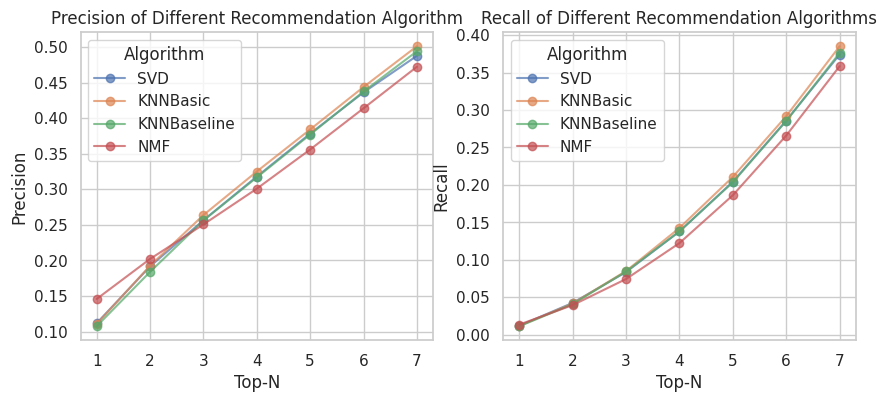

In [46]:
# Create subplots
fig, axes = plt.subplots(1,2, figsize = (10,4))

# Plot precision for each algorithm
for algorithm in precision_results['model'].unique():
    subset = precision_results[precision_results['model'] == algorithm]
    axes[0].plot(subset['topk'], subset['precision'], marker='o', label=algorithm, alpha=.7)
    axes[0].set_title('Precision of Different Recommendation Algorithm')
    axes[0].set_xlabel('Top-N')
    axes[0].set_ylabel('Precision')
    axes[0].legend(title='Algorithm')
    axes[0].grid(True)

# Plot recall for each algorithm
for algorithm in recall_results['model'].unique():
    subset = recall_results[recall_results['model']==algorithm]
    axes[1].plot(subset['topk'], subset['recall'], marker='o', label=algorithm,alpha=.7)
    axes[1].set_title('Recall of Different Recommendation Algorithms')
    axes[1].set_xlabel('Top-N')
    axes[1].set_ylabel('Recall')
    axes[1].legend(title='Algorithm')

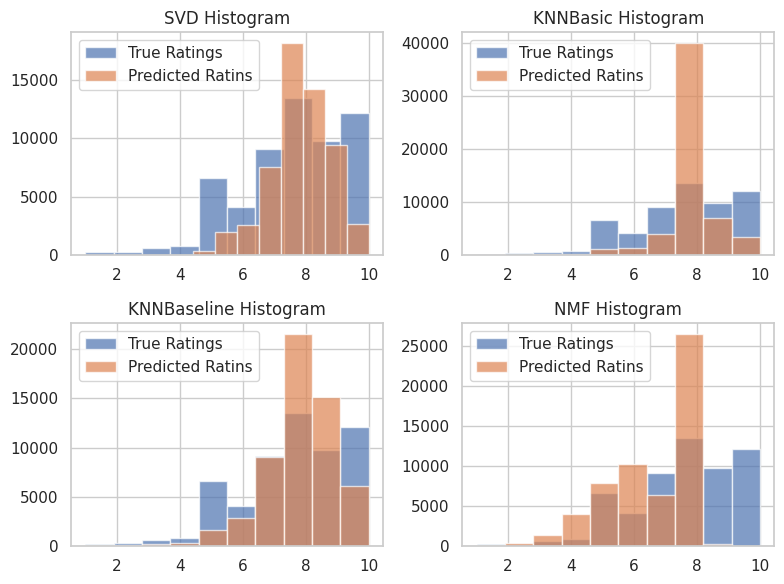

'\nBasic은 정확도는 높았지만 예측값이 8에 몰려있음. 따라서 SVD가 더 나음.\nBaseline은 Basic보다 분포가 더 잘맞고 SVD랑은 비슷\nNFM은 높은 점수를 예측하지못함. 안좋다.\n'

In [47]:
# Histogram
# Number of subplots (equal to number of models)
num_models = len(models_predictions)

# Create subplots (arranged in 2 rows)
fig, axes = plt.subplots(nrows=2, ncols=(num_models+1)//2, figsize = (8,6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the models and predictions
for idx, (model_name, model_info) in enumerate(models_predictions.items()):
    # Get the true and predicted ratings
    predictions = model_info['predictions']
    y_true = [true_r[2] for true_r in testset] # True ratings from testset
    y_pred = [pred.est for pred in predictions] # Predicted ratings

    # Plot histograms for true and predicted ratings in a subplot
    pd.Series(y_true).hist(alpha=0.7, label='True Ratings', ax=axes[idx])
    pd.Series(y_pred).hist(alpha=0.7, label='Predicted Ratins', ax=axes[idx])

    # Set titles and labels
    axes[idx].set_title(f'{model_name} Histogram')
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

'''
Basic은 정확도는 높았지만 예측값이 8에 몰려있음. 따라서 SVD가 더 나음.
Baseline은 Basic보다 분포가 더 잘맞고 SVD랑은 비슷
NFM은 높은 점수를 예측하지못함. 안좋다.
'''

- Note
  - RMSE, MAE 기준 SVD가 높은 성능(에러 수치이므로 낮은 값일수록 성능 높음)을 보였으나,
  - 랭킹지표(Recall, Precision)의 경우 KNNBasic이 가장 높은 성능을 보임.(단 NMF 제외하면 차이는 크지않음.

# 추천 알고리즘 성능 고도화
데이터 수집하거나 줄이거나, 도메인지식과 연결, 전처리/후처리 조건 넣거나 한다.
이번엔 알고리즘을 고도화한다.

- DeepLearning 계열 DNN, NCF via TensorFlow
- Regression 계열 Model(Linear Regression, Ridge, Random Forest, GradientBoosting 등) via Scikit-learn

## Regression 모델

피쳐가 꼭 필요함.당연.
선형관계를 가정하는 Linear Regression과 비선형관계를 가정하는 Tree-based 앙상블기법

- Linear Regression
  - 선형 관계를가정. 실제에선 선형관계가 잘 없다.. 예측성능이 낮은 경향. scale 및 아웃라이어에 민감
- Tree-based Ensemble
  - 비선형 관계를 가정, Scale 및 아웃라이어에 큰 영향을 받지 않음. 대부분 실제에선 비선형 관계. 계산비용이 높고 수식이 상대적으로 복잡하며 다소 블랙박스 형태의 모델이므로 예측과정 및 이유에 대한 설명력이 높지 않음.
 
- Deep Learning 모델
  - 사람의 뇌를 모방한 구조. 더 복잡한 패턴을 찾아냄
  - 데이터를 매우 복잡한 방식으로 처리할 수 있으며, 여러 중간 레이어에서 특징추을 자동으로 수행
  - 특히 이미지, 음성, 자연어 처리 등에서 뛰어남


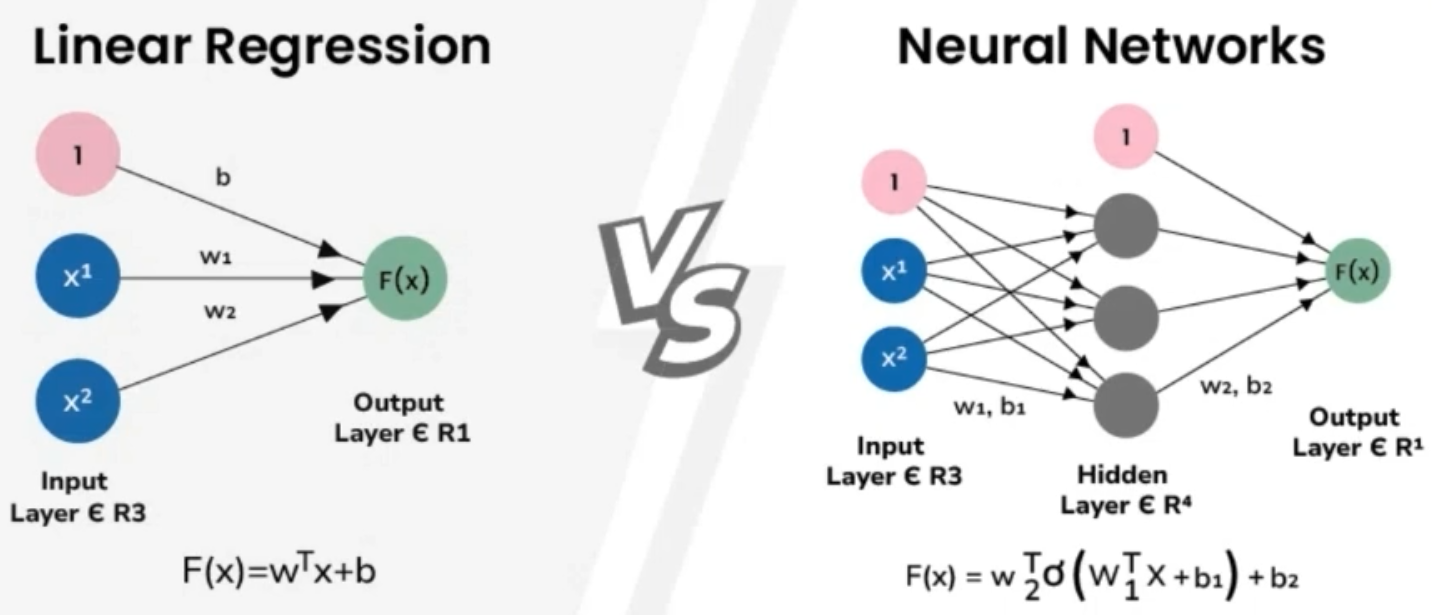

In [48]:
# DNN, NCF 모델을 이용하여 1차 성능 고도화 시도를 진행한다.
# Regression 계열 모델을 이용하여 2차 성능 고도화를 진행한다.


# user_id_mapped: 매핑된 사용자 ID. 원래의 사용자 ID를 정수 인덱스로 변환한 값으로, 각 사용자를 고유하게 식별.
# isbn_mapped: 매핑된 ISBN. 원래의 ISBN을 정수 인덱스로 변환한 값으로, 각 아이템(책)을 고유하게 식별.

from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense, BatchNormalization, Dropout

# Preparing user and item embeddings
n_users = df_mf['user_id'].nunique()
n_items = df_mf['isbn'].nunique()

# Creating user and item IDs mapping
user_mapping = {user: idx for idx, user in enumerate(df_mf['user_id'].unique())}
item_mapping = {item: idx for idx, item in enumerate(df_mf['isbn'].unique())}

# Mapping user and item IDs
df_mf['user_id_mapped'] = df_mf['user_id'].map(user_mapping)
df_mf['isbn_mapped'] = df_mf['isbn'].map(item_mapping)

In [49]:
# 새로운 인덱스 생성
df_mf.sort_values('user_id').head()

user_id        isbn  rating  user_id_mapped  isbn_mapped
14611      254  0446341932     5.0            1356          337
12453      254  0373226144     5.0            1356          271
12443      254  0373226063     6.0            1356          269
17314      254  1931081727     9.0            1356          430
17300      254  156971620X     9.0            1356          428

In [50]:
# Stratified split
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.3, random_state=42)

for train_idx, test_idx in split.split(df_mf, df_mf['user_id']): # 나눌df, 기준
    strat_train_set = df_mf.iloc[train_idx]
    strat_test_set = df_mf.iloc[test_idx]

# Splitting the data
X_train = strat_train_set[['user_id_mapped', 'isbn_mapped']]
y_train = strat_train_set['rating']

X_test = strat_test_set[['user_id_mapped', 'isbn_mapped']]
y_test = strat_test_set['rating']

In [51]:
# 피쳐
X_train.sort_index().head()

user_id_mapped  isbn_mapped
1                0            0
3                1            0
12               5            1
15               6            1
17               0            2

In [52]:
strat_train_set.sort_index().head()

user_id        isbn  rating  user_id_mapped  isbn_mapped
1     11676  0002005018     8.0               0            0
3    116866  0002005018     9.0               1            0
12   110912  0374157065    10.0               5            1
15   197659  0374157065     9.0               6            1
17    11676  0399135782     9.0               0            2

In [53]:
print(X_train.shape)
print(X_test.shape)

(132995, 2)
(56998, 2)


#DNN (Deep Neural Network)

- 딥러닝 기반 회귀모델 구축 후 학습
- ReLU 활성화함수(음수를 0으로, 양수는 그대로 출)와 정규화(Batch Normalization 0~1사이, Dropout - 오버피팅 방지)사용.


In [54]:
# 나중에 공부 끝나고 다시 내가 설계 해보기
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential()

# 입력층
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) # fully connected, 레이어 입력층 선언
model.add(BatchNormalization()) # 레이어 출력을 정규화하여 학습을 안정적으로 만든다.
model.add(Dropout(0.2)) # 랜덤하게 20% 가중치 삭제

# 히든 레이어
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 출력층
model.add(Dense(1)) # 출력층으로, 1개의 노드만 가짐. 출력값이 하나(연속형 값)

# Compile the model
# learning_rate = 0.01 학습 속도, 학습이 진행될수록 decay=0.01을 통해 학습률이 점점 감소
optimizer = Adam(learning_rate=0.01, decay=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001) #검증 데이터의 손실 값(val_loss)이 5번의 에포크 동안 개선되지 않으면 학습 중단. 5번 에포크수 동안, 손실 값이 0.001 미만으로 개선될 경우 변화로 카운팅 제외

# ReduceLROnPlateau : 모델의 학습 중에 검증 손실(val_loss)이 일정 기간 동안 개선되지 않을 때 학습률(learning rate)을 감소시키는 기능
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001) #학습률 조절. 검증 손실이 3번의 에포크 동안 개선되지 않으면 학습률을 50% 감소, 최소 학습률은 0.0001

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.2,
          callbacks=[early_stopping, reduce_lr])

Epoch 1/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 18.6165 - val_loss: 3.3012 - learning_rate: 0.0100
Epoch 2/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.0635 - val_loss: 3.2697 - learning_rate: 0.0100
Epoch 3/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.9860 - val_loss: 3.2687 - learning_rate: 0.0100
Epoch 4/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.8969 - val_loss: 3.2395 - learning_rate: 0.0100
Epoch 5/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.8073 - val_loss: 3.2596 - learning_rate: 0.0100
Epoch 6/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.6707 - val_loss: 3.2468 - learning_rate: 0.0100
Epoch 7/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.5889 - val_loss: 3.2384 - learning_rate: 0.0100
Epoch 8/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.4658 - val_loss: 3.2799 - learning_rate: 0.0100
Epoch 9/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.3922 - val_loss: 3.2575 - learning_rate: 0.0100
Epoch 10/

In [55]:
y_pred = model.predict([X_test, X_test])

1782/1782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [56]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'DNN RMSE: {rmse:.4f}')

mae = mean_absolute_error(y_test, y_pred) # No square root for MAE
print(f'DNN MAE: {mae:.4f}')

DNN RMSE: 1.8118
DNN MAE: 1.4453


In [57]:
# DNN은 KNNBasic 보단 좋지만 SVD보단 별로다.
results_df

Algorithm  RMSE   MAE
0          SVD  1.55  1.17
1     KNNBasic  1.95  1.53
2  KNNBaseline  1.66  1.25
3          NMF  2.45  2.04

In [58]:
dnn_results = {'Algorithm' : 'DNN', 'RMSE': rmse, 'MAE' : mae}
dnn_results

{'Algorithm': 'DNN', 'RMSE': 1.8117796091820861, 'MAE': 1.4453482257428472}

In [59]:
results_df = pd.concat([results_df, pd.DataFrame([dnn_results])], ignore_index=True)
results_df

Algorithm     RMSE       MAE
0          SVD  1.55000  1.170000
1     KNNBasic  1.95000  1.530000
2  KNNBaseline  1.66000  1.250000
3          NMF  2.45000  2.040000
4          DNN  1.81178  1.445348

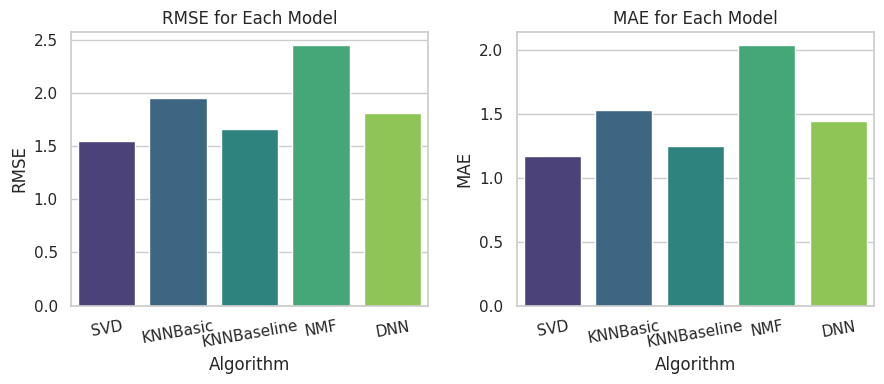

In [60]:
# Set the style of the visualization
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1,2, figsize=(9,4), sharey=False)

# Bar plot for RMSE
sns.barplot(x='Algorithm', y='RMSE', data = results_df, palette='viridis', ax=axes[0])
axes[0].set_title('RMSE for Each Model')
axes[0].tick_params(axis='x', rotation=10)

# Bar plot for MAE
sns.barplot(x='Algorithm', y='MAE', data = results_df, palette='viridis', ax=axes[1])
axes[1].set_title('MAE for Each Model')
axes[1].tick_params(axis='x', rotation=10)

# Adjust layout
plt.tight_layout()
plt.show()

In [61]:
# DNN precision, recall
def get_precision_recall_from_testdata(test_data, top_n, threshold, y_pred):
    top_k = top_n

    predictions_df = test_data.copy()
    predictions_df = predictions_df[['user_id','isbn','rating']]
    predictions_df['est_rating'] = y_pred

    predictions_df['pred_rank'] = predictions_df.groupby('user_id')['est_rating'].rank(method='first', ascending=False)
    predictions_df['true_rank'] = predictions_df.groupby('user_id')['rating'].rank(method='first', ascending=False)
    predictions_df['is_relevant'] = predictions_df['true_rank'] <= top_k
    predictions_df = predictions_df.sort_values(by='user_id')

    predicted_top_k = predictions_df[predictions_df['pred_rank'] <= top_k]
    precision_per_user = predicted_top_k.groupby('user_id')['is_relevant'].sum()
    total_relevant_items = predictions_df.query('rating >= @threshold').groupby('user_id').size()

    precision_at_k = precision_per_user / top_k
    recall_at_k = precision_per_user / total_relevant_items

    return precision_at_k.mean(), recall_at_k.mean()
    

In [62]:
# Dictionary to store models and their predictions
models_predictions = {}

# Evaluate models and get hit ratios
top_n_values = [1,2,3,4,5,6,7]
dnn_precision_results = []
dnn_recall_results = []
threshold = 7

model_name = 'DNN'
# Get precision for different Top-N values
for top_n in top_n_values:
    dnn_precision, dnn_recall = get_precision_recall_from_testdata(strat_test_set, top_n, threshold, y_pred)
    dnn_precision_results.append({'model':model_name, 'topk':top_n, 'precision':dnn_precision})
    dnn_recall_results.append({'model':model_name, 'topk':top_n,'recall':dnn_recall})

In [63]:
dnn_precision_results

[{'model': 'DNN', 'topk': 1, 'precision': 0.0808411214953271},
 {'model': 'DNN', 'topk': 2, 'precision': 0.14953271028037382},
 {'model': 'DNN', 'topk': 3, 'precision': 0.21105919003115264},
 {'model': 'DNN', 'topk': 4, 'precision': 0.2714953271028037},
 {'model': 'DNN', 'topk': 5, 'precision': 0.32990654205607484},
 {'model': 'DNN', 'topk': 6, 'precision': 0.3880841121495327},
 {'model': 'DNN', 'topk': 7, 'precision': 0.44773030707610145}]

In [64]:
precision_results = pd.concat([precision_results, pd.DataFrame(dnn_precision_results)])
recall_results = pd.concat([recall_results, pd.DataFrame(dnn_recall_results)])

In [65]:
# DNN생각보다 성능 별로다. 구조를 간단하게 해서 그런것같다. 그래서 특화된 SVD보다 안좋은 퍼포먼스를 보임.
precision_results.pivot_table(index='model', columns='topk', values='precision').round(3)

topk             1      2      3      4      5      6      7
model                                                       
DNN          0.081  0.150  0.211  0.271  0.330  0.388  0.448
KNNBaseline  0.107  0.184  0.256  0.317  0.377  0.438  0.494
KNNBasic     0.111  0.193  0.264  0.325  0.384  0.444  0.501
NMF          0.146  0.202  0.251  0.301  0.356  0.414  0.472
SVD          0.112  0.192  0.257  0.318  0.378  0.436  0.488

In [66]:
recall_results.pivot_table(index='model', columns='topk', values='recall').round(3)

topk             1      2      3      4      5      6      7
model                                                       
DNN          0.010  0.035  0.073  0.125  0.188  0.265  0.356
KNNBaseline  0.011  0.041  0.085  0.138  0.204  0.285  0.376
KNNBasic     0.012  0.042  0.085  0.143  0.211  0.292  0.385
NMF          0.014  0.040  0.075  0.122  0.186  0.266  0.358
SVD          0.012  0.043  0.084  0.138  0.204  0.286  0.374

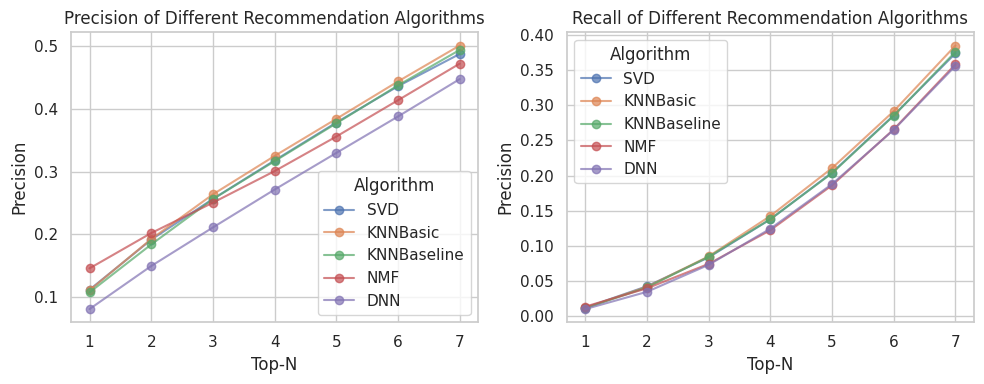

In [67]:
# Create subplots
fig, axes = plt.subplots(1,2,figsize=(10,4))

# Plot precision for each algorithm
for algorithm in precision_results['model'].unique():
    subset = precision_results[precision_results['model'] == algorithm]
    axes[0].plot(subset['topk'], subset['precision'], marker = 'o', label=algorithm, alpha=.7)
    axes[0].set_title('Precision of Different Recommendation Algorithms')
    axes[0].set_xlabel('Top-N')
    axes[0].set_ylabel('Precision')
    axes[0].legend(title='Algorithm')
    axes[0].grid(True)

# Plot recall for each algorithm
for algorithm in recall_results['model'].unique():
    subset = recall_results[recall_results['model']==algorithm]
    axes[1].plot(subset['topk'], subset['recall'], marker = 'o', label=algorithm, alpha=.7)
    axes[1].set_title('Recall of Different Recommendation Algorithms')
    axes[1].set_xlabel('Top-N')
    axes[1].set_ylabel('Precision')
    axes[1].legend(title='Algorithm')
    axes[1].grid(True)

plt.tight_layout()
plt.show()

# Neural Colaborative Filtering(NCF)

- 기본적인 모델인 Collaborative Filtering을 신경망 구조로 확장. 사용자 아이템간 비선형 관계 모델링 가능
- Matrix Factorization처럼 사용자의 잠재 요인(latent factors)과 아이템 잠재 요인을 학습
- 두 모델의 장점을 혼합
- 기본적으로 CF는 선형

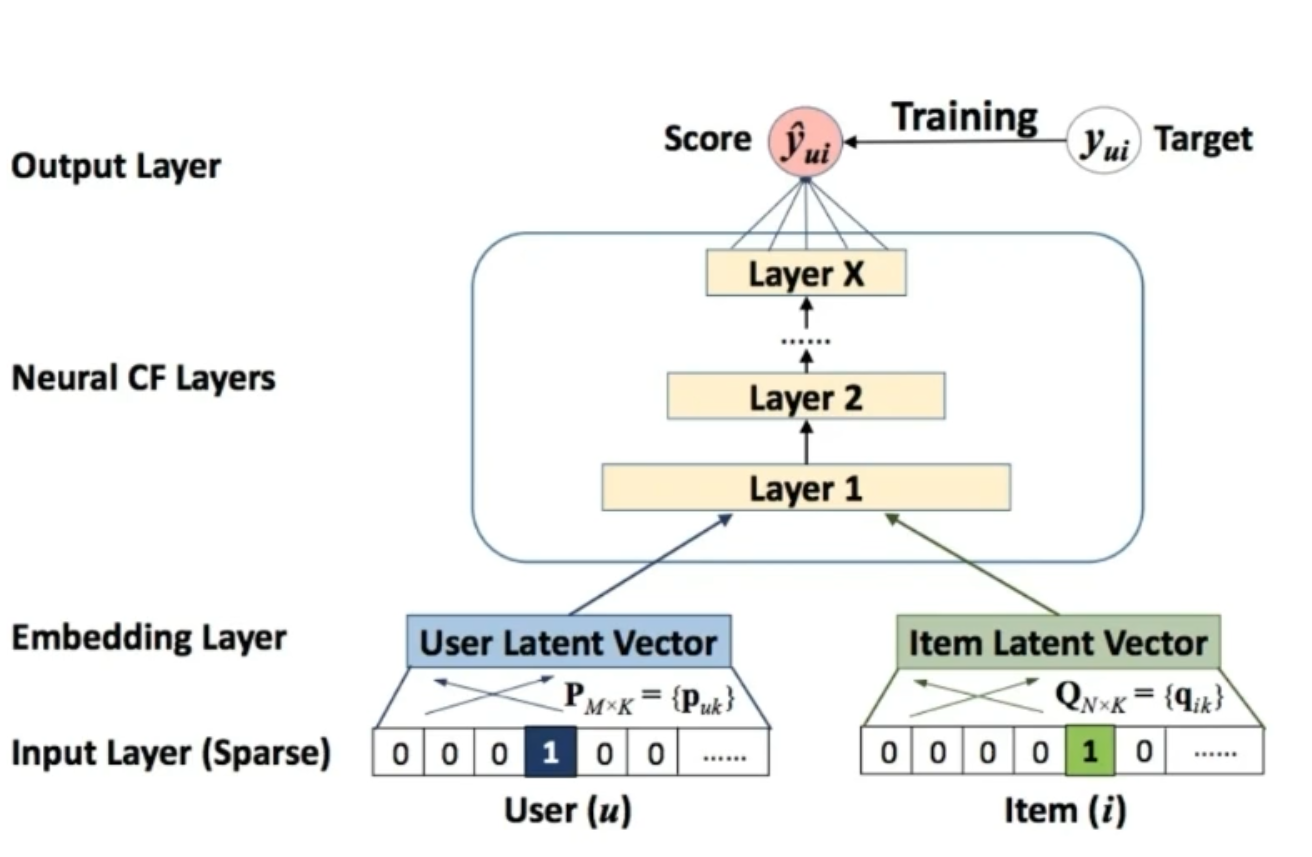

해당 유저에 1,0으로 input layer
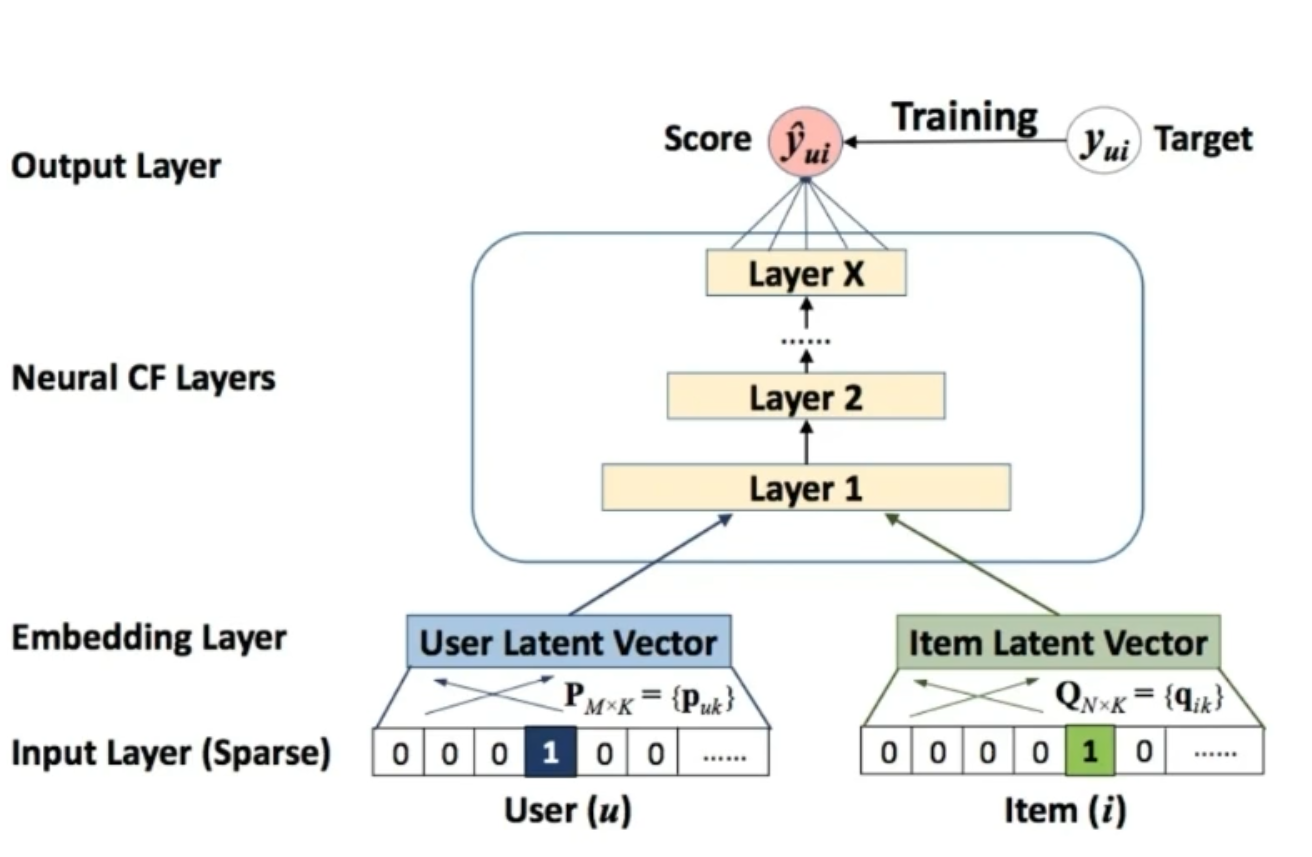

In [68]:
# Neural Collaborative Filtering model
n_latent_factors = 64 # 사용자와 아이템의 잠재 요인 수를 정의. 원하는 팩터개수. sparse한 인풋레이어에서 64개 차원으로 축소함

user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

user_embedding = Embedding(n_users, n_latent_factors)(user_input) # n_users만큼 임베딩 진행
#User Latent Vector
user_vec = Flatten()(user_embedding) # 임베딩된 벡터를 1차원 배열로 변환 ->dense layer 입력용

item_embedding=Embedding(n_items, n_latent_factors)(item_input)
item_vec = Flatten()(item_embedding)

# Concatenate user and item embedings 합쳐서 레이어에 넣는다.
concat = Concatenate()([user_vec, item_vec]) # 사용자 벡터와 아이템 벡터를 연결하여 하나의 벡터로 통합
# ?? 이게 인풋이니 따로 input= 안해줘도 되나?

# Adding fully connected layers with batch normalization and dropout
dense = Dense(256, activation='relu')(concat)
dense = BatchNormalization()(dense)
dense = Dropout(0.2)(dense)

dense = Dense(128, activation='relu')(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.2)(dense)

output = Dense(1)(dense) # 예측값 한개

# 실제값과 예측값 오차가 가장 적은 형태로 학습한다. loss = 'mean_squared_error'
# Compile model
model = Model([user_input, item_input], output)
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fit the model 오래걸려서 일단 2번만. 원래는 로스가 최대한 줄때까지 에포크 돌림
model.fit([X_train['user_id_mapped'], X_train['isbn_mapped']], y_train, epochs = 2, batch_size = 128, validation_split = 0.2)

# Predict and evaluate
y_pred = model.predict([X_test['user_id_mapped'], X_test['isbn_mapped']])

Epoch 1/2
832/832 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - loss: 25.4646 - val_loss: 2.6703
Epoch 2/2
832/832 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - loss: 2.9950 - val_loss: 2.5287
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step


In [69]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'NCF RMSE: {rmse:.4f}')

mae = mean_absolute_error(y_test, y_pred) # No squared root for MAE
print(f'NCF MAE: {mae:.4f}')

NCF RMSE: 1.5952
NCF MAE: 1.1925


In [70]:
ncf_results = {'Algorithm':'NCF', 'RMSE':rmse, 'MAE':mae}
ncf_results

{'Algorithm': 'NCF', 'RMSE': 1.5952411909449815, 'MAE': 1.1925019438950495}

In [71]:
results_df = pd.concat([results_df, pd.DataFrame([ncf_results])], ignore_index=True)
results_df

Algorithm      RMSE       MAE
0          SVD  1.550000  1.170000
1     KNNBasic  1.950000  1.530000
2  KNNBaseline  1.660000  1.250000
3          NMF  2.450000  2.040000
4          DNN  1.811780  1.445348
5          NCF  1.595241  1.192502

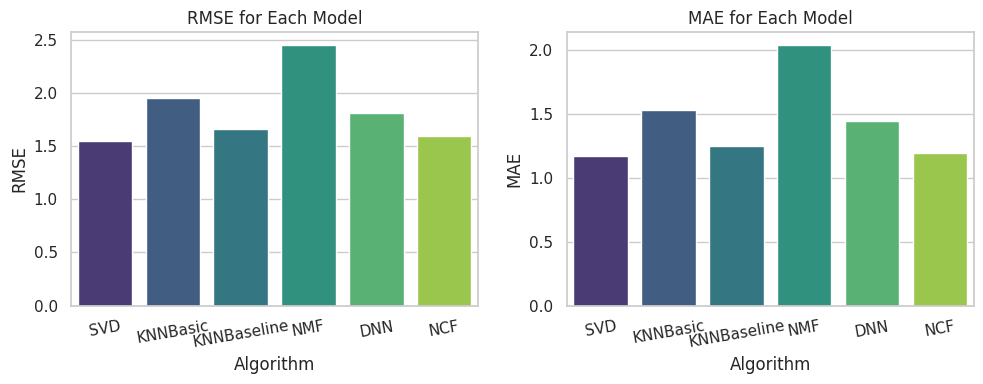

In [72]:
# Set the style of the visualization
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=False)

# Bar plot for RMSE
sns.barplot(x='Algorithm', y='RMSE', data=results_df, palette='viridis', ax=axes[0])
axes[0].set_title('RMSE for Each Model')
axes[0].tick_params(axis='x', rotation=10)

# Bar plot for MAE
sns.barplot(x='Algorithm', y='MAE', data = results_df, palette='viridis', ax = axes[1])
axes[1].set_title('MAE for Each Model')
axes[1].tick_params(axis='x', rotation=10)

# Adjust layout
plt.tight_layout()
plt.show()

# DNN이 NCF랑 비슷하네?
# 다시 돌리면 NMF랑 DNN이랑 비슷하게 나올수도있음

In [73]:
# Dictionary to store models and their predictions
models_predictions = {}

# Evaluate models and get hit ratios
top_n_values = [1,2,3,4,5,6,7]
ncf_precision_results = []
ncf_recall_results = []
threshold = 7

model_name = 'NCF'
# Get precision for different Top-N values
for top_n in top_n_values:
    ncf_precision, ncf_recall = get_precision_recall_from_testdata(strat_test_set, top_n, threshold, y_pred)
    ncf_precision_results.append({'model':model_name,'topk':top_n, 'precision':ncf_precision})
    ncf_recall_results.append({'model':model_name,'topk':top_n,'recall':ncf_recall})

In [74]:
precision_results = pd.concat([precision_results, pd.DataFrame(ncf_precision_results)])
recall_results = pd.concat([recall_results, pd.DataFrame(ncf_recall_results)])

In [75]:
precision_results.pivot_table(index = 'model', columns='topk', values='precision').round(3)

# 수치가 높을수록 좋다 정확도니까

topk             1      2      3      4      5      6      7
model                                                       
DNN          0.081  0.150  0.211  0.271  0.330  0.388  0.448
KNNBaseline  0.107  0.184  0.256  0.317  0.377  0.438  0.494
KNNBasic     0.111  0.193  0.264  0.325  0.384  0.444  0.501
NCF          0.087  0.153  0.217  0.276  0.334  0.387  0.449
NMF          0.146  0.202  0.251  0.301  0.356  0.414  0.472
SVD          0.112  0.192  0.257  0.318  0.378  0.436  0.488

In [76]:
# 정리. mae나 rmse기준으로 봤을때 ncf가 나쁘지않았지만, 만약
# recall이나 precision k을 기준으로 보면 딥러닝은 별로고 오히려 svd나 knn이 성능이 좋다

recall_results.pivot_table(index='model', columns = 'topk', values='recall').round(3)

topk             1      2      3      4      5      6      7
model                                                       
DNN          0.010  0.035  0.073  0.125  0.188  0.265  0.356
KNNBaseline  0.011  0.041  0.085  0.138  0.204  0.285  0.376
KNNBasic     0.012  0.042  0.085  0.143  0.211  0.292  0.385
NCF          0.010  0.034  0.072  0.122  0.185  0.259  0.351
NMF          0.014  0.040  0.075  0.122  0.186  0.266  0.358
SVD          0.012  0.043  0.084  0.138  0.204  0.286  0.374

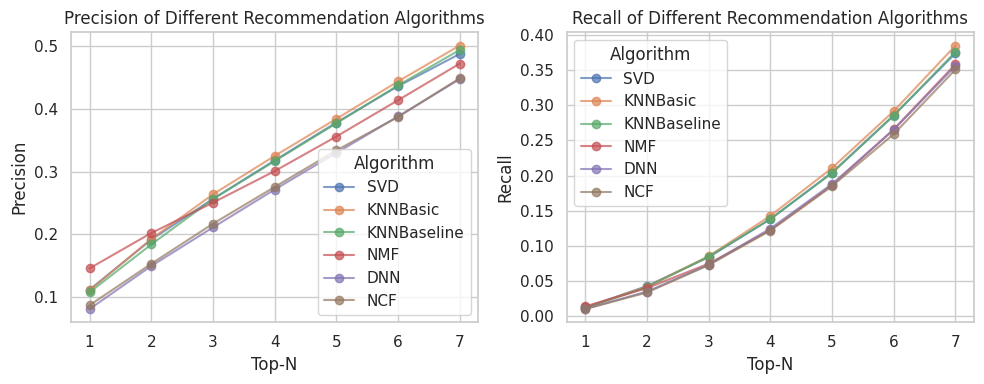

In [77]:
# Create subplots
fig, axes = plt.subplots(1,2, figsize = (10,4))

# 코드 체크좀
# Plot precision for each algorithm
for algorithm in precision_results['model'].unique():
    subset = precision_results[precision_results['model']==algorithm]
    axes[0].plot(subset['topk'], subset['precision'], marker = 'o', label = algorithm, alpha=.7)
    axes[0].set_title('Precision of Different Recommendation Algorithms')
    axes[0].set_xlabel('Top-N')
    axes[0].set_ylabel('Precision')
    axes[0].legend(title='Algorithm')
    axes[0].grid(True)

# Plot recall for each algorithm
for algorithm in recall_results['model'].unique():
    subset = recall_results[recall_results['model']==algorithm]
    axes[1].plot(subset['topk'], subset['recall'], marker='o', label=algorithm, alpha=.7)
    axes[1].set_title('Recall of Different Recommendation Algorithms')
    axes[1].set_xlabel('Top-N')
    axes[1].set_ylabel('Recall')
    axes[1].legend(title='Algorithm')
    axes[1].grid(True)

plt.tight_layout()
plt.show()
# 만약 recall이나 precision이 중요한 케이스라면 딥러닝보다는 svd,knn

Machine Learning(Regression) Model

- 딥러닝 모델의 경우 비정형 데이터(이미지, 오디오, 텍스트 등)에서 스스로 피처를 추출하고 복잡한 관계를 학습하는데 특화된 반면
- 간단한 데이터나 Tabular 데이터셋에서는 잘 맞지 않는 경향이 있다. SVD나 KNNB모델이 적합하
- 이 경우 Linear Regression 과 같은 전통적인 구조가 간단하여 속도가 빠르고 설명력이 높고 리소스 및 운영 코스트 효율이 높은 머신러닝 모델을 주로 이용
- 수많은 Regression 알고리즘 중에서 몇개를 선정하여 아래와 같이 딕셔너리를 선언하여 각 성틍을 체크

In [78]:
# Non-linear relationship - Tree model

In [79]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet # 같은계열들
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Regression 알고리즘 후보(이중에서 높은 성능을 보이는 모델을 실험을 통해 빠르게 찾는 과정이 중요)
models = {
    'Linear Regression':LinearRegression(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'Random Forest':RandomForestRegressor(n_estimators=100, random_state = 42),
    'Gradient Boosting':GradientBoostingRegressor(n_estimators=100, random_state=42),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
}
models

{'Linear Regression': LinearRegression(),
 'Ridge': Ridge(),
 'ElasticNet': ElasticNet(),
 'Random Forest': RandomForestRegressor(random_state=42),
 'Gradient Boosting': GradientBoostingRegressor(random_state=42),
 'ExtraTreesRegressor': ExtraTreesRegressor()}

In [80]:
df.head()

user_id      age        isbn  rating    book_title           book_author  \
0        8  34.7439  0002005018     5.0  Clara Callan  Richard Bruce Wright   
1    11676  34.7439  0002005018     8.0  Clara Callan  Richard Bruce Wright   
2    67544  30.0000  0002005018     8.0  Clara Callan  Richard Bruce Wright   
3   116866  34.7439  0002005018     9.0  Clara Callan  Richard Bruce Wright   
4   123629  34.7439  0002005018     9.0  Clara Callan  Richard Bruce Wright   

   year_of_publication  \
0               2001.0   
1               2001.0   
2               2001.0   
3               2001.0   
4               2001.0   

                                                                                                            summary  \
0  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
1  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
2  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
3  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
4  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   

    category  age_range  
0  Actresses         30  
1  Actresses         30  
2  Actresses         30  
3  Actresses         30  
4  Actresses         30

In [81]:
# Preprocessing
df_mf = df[['user_id','isbn', 'rating']].drop_duplicates()

user_list = df_mf.groupby('user_id').size().reset_index()
user_list.columns = ['user_id', 'review_cnt']
user_list = user_list[user_list['review_cnt']>=30]

df_mf = df_mf[df_mf['user_id'].isin(user_list.user_id)]

In [82]:
df_mf.head()

user_id        isbn  rating
1     11676  0002005018     8.0
3    116866  0002005018     9.0
7    219008  0002005018     7.0
8    263325  0002005018     6.0
11    35704  0374157065     6.0

In [83]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state = 42)

for train_idx, test_idx in split.split(df_mf, df_mf['user_id']):
    strat_train_set = df_mf.iloc[train_idx]
    strat_test_set = df_mf.iloc[test_idx]

In [84]:
# 피쳐정보가 없기 때문에 book_info의
# book_title, year_of_publication, book_author, category, rating_mean, rating_count 를 조인시킴

strat_test_set.head()

user_id        isbn  rating
3569     131032  0671864769     6.0
239869   251394  0425038262     8.0
324637   100906  2211063276    10.0
342435   137688  0571191797     6.0
199478    27875  0316037451     8.0

In [85]:
print(strat_train_set.user_id.nunique())
print(strat_test_set.user_id.nunique())

2140
2140


In [86]:
book_info.head()

isbn                                       book_title  \
203   0316666343                        The Lovely Bones: A Novel   
22    0971880107                                      Wild Animus   
1017  0385504209                                The Da Vinci Code   
701   0312195516              The Red Tent (Bestselling Backlist)   
1358  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel   

      year_of_publication    book_author category  rating_mean  rating_count  
203                2002.0   Alice Sebold      NaN     8.185290           707  
22                 2004.0   Rich Shapero  Fiction     4.390706           581  
1017               2003.0      Dan Brown  Fiction     8.435318           487  
701                1998.0  Anita Diamant  Fiction     8.182768           383  
1358               1997.0  Rebecca Wells  Fiction     7.887500           320

In [87]:
user_info = df[['user_id', 'age']].drop_duplicates()
user_info.head()

user_id      age
0        8  34.7439
1    11676  34.7439
2    67544  30.0000
3   116866  34.7439
4   123629  34.7439

In [88]:
def encode_categorical_columns(df):
    categorical_columns = ['isbn', 'book_author', 'category']
    for column in categorical_columns:
        df[f'{column}_encoded']=df[column].astype('category').cat.codes
    return df

def prepare_data(df, book_info, user_info):
    # inner join
    merged_df = df.merge(book_info, on=['isbn'])\
                  .merge(user_info[['user_id', 'age']].drop_duplicates(), on = 'user_id')
    encoded_df = encode_categorical_columns(merged_df)
    return encoded_df

strat_train_set = prepare_data(strat_train_set, book_info, user_info)
strat_test_set = prepare_data(strat_test_set, book_info, user_info)

In [89]:
# 원-핫 인코딩은 범주 수가 많을 경우 열 수가 증가하여 메모리 사용량이 많아질 수 있다. 따라서 범주 수가 많지 않은 경우에 유리합니다.
pd.get_dummies(strat_train_set[:5]['book_title'])

Dalva  Kissing in Manhattan  TOTAL ECLIPSE  The Notebook  \
0   True                 False          False         False   
1  False                 False          False         False   
2  False                 False          False          True   
3  False                 False           True         False   
4  False                  True          False         False   

   Venison Cookery: The Complete Hunter (Hunting & Fishing Library)  
0                                                             False  
1                                                              True  
2                                                             False  
3                                                             False  
4                                                             False

In [90]:
# 정수 인코딩
strat_train_set[:5]['book_title'].astype('category').cat.codes

0    0
1    4
2    3
3    2
4    1
dtype: int8

In [91]:
strat_train_set.head(2)

user_id        isbn  rating  \
0   183287  2264016124    10.0   
1   188027  0865730687     8.0   

                                                         book_title  \
0                                                             Dalva   
1  Venison Cookery: The Complete Hunter (Hunting & Fishing Library)   

   year_of_publication                  book_author category  rating_mean  \
0               1991.0                 Jim Harrison  Fiction          9.0   
1               1997.0  Hunting and Fishing Library      NaN          8.0   

   rating_count   age  isbn_encoded  book_author_encoded  category_encoded  
0             5  28.0         72731                15428              1455  
1             1  44.0         58614                12834                -1

In [92]:
# 인코딩 된 칼럼만 선택함
def split_data(df):
    features = ['age', 'isbn_encoded', 'book_author_encoded', 'year_of_publication',
                'rating_mean', 'rating_count', 'category_encoded']
    
    X = df[features]
    y = df['rating']
    return X, y

X_train, y_train = split_data(strat_train_set)
X_test, y_test = split_data(strat_test_set)

In [93]:
# -1은 missing value
X_train.head()

age  isbn_encoded  book_author_encoded  year_of_publication  rating_mean  \
0  28.0         72731                15428               1991.0     9.000000   
1  44.0         58614                12834               1997.0     8.000000   
2  27.0         28714                24268               1998.0     7.689320   
3  45.0         41670                20058               1995.0     7.000000   
4  44.0         21134                 6185               2002.0     8.363636   

   rating_count  category_encoded  
0             5              1455  
1             1                -1  
2           206                -1  
3             2                -1  
4            11              1455

In [94]:
y_train.head()

0    10.0
1     8.0
2    10.0
3     7.0
4     6.0
Name: rating, dtype: float64

In [95]:
# shape 체크 중요!
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(132995, 7)
(132995,)
(56998, 7)
(56998,)


In [96]:
X_test.head()

age  isbn_encoded  book_author_encoded  year_of_publication  \
0  36.0000         23586                13230               1992.0   
1  25.0000         12916                18090               1978.0   
2  34.0000         37717                 8500               1991.0   
3  46.0000         20857                 3964               1997.0   
4  34.7439          5888                 3250               1991.0   

   rating_mean  rating_count  category_encoded  
0     6.666667             6               913  
1     6.000000             2                -1  
2    10.000000             1                -1  
3     6.000000             1               783  
4     7.250000             8              1201

In [97]:
# 안넣은 모델과 하이퍼파라미터 설정은 시간이 너무 오래걸림..
models

{'Linear Regression': LinearRegression(),
 'Ridge': Ridge(),
 'ElasticNet': ElasticNet(),
 'Random Forest': RandomForestRegressor(random_state=42),
 'Gradient Boosting': GradientBoostingRegressor(random_state=42),
 'ExtraTreesRegressor': ExtraTreesRegressor()}

In [98]:
results = {}
# Iterate over the models and calculate the MAE and RMSE values
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(name, model) # printing log
    results[name] = {'MAE':mae, 'RMSE':rmse}

Linear Regression LinearRegression()
Ridge Ridge()
ElasticNet ElasticNet()
Random Forest RandomForestRegressor(random_state=42)
Gradient Boosting GradientBoostingRegressor(random_state=42)
ExtraTreesRegressor ExtraTreesRegressor()


In [99]:
# MAE, RMSE 기준으론 Gradient Boosting이 성능이 제일 좋다.
pd.DataFrame(results)

Linear Regression     Ridge  ElasticNet  Random Forest  \
MAE            0.856065  0.856066    1.086732       0.844909   
RMSE           1.271743  1.271743    1.403882       1.293220   

      Gradient Boosting  ExtraTreesRegressor  
MAE            0.836266             0.863272  
RMSE           1.259978             1.322493

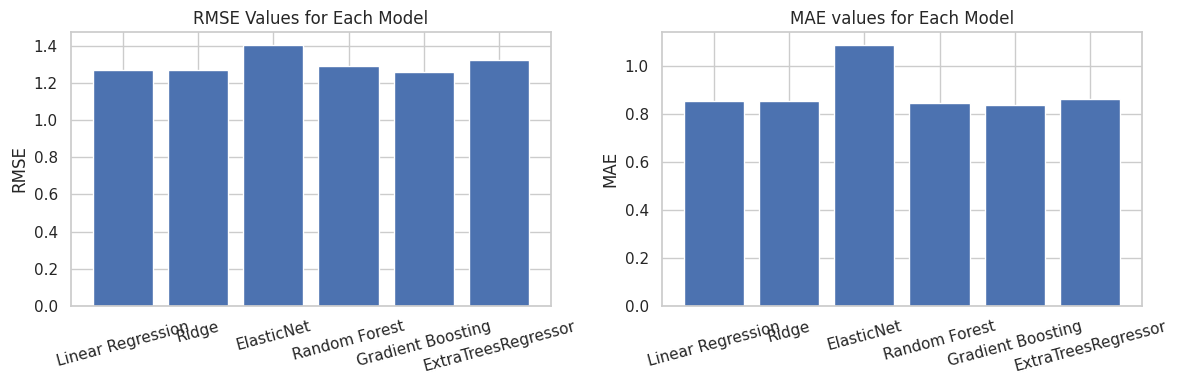

In [100]:
sns.set(style = 'whitegrid')

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar(results.keys(), [value['RMSE'] for value in results.values()])
plt.ylabel('RMSE')
plt.xticks(rotation = 15)
plt.title('RMSE Values for Each Model')

plt.subplot(1,2,2)
plt.bar(results.keys(), [value['MAE'] for value in results.values()])
plt.ylabel('MAE')
plt.xticks(rotation = 15)
plt.title('MAE values for Each Model')

plt.tight_layout()
plt.show()

# 낮을수록 좋다

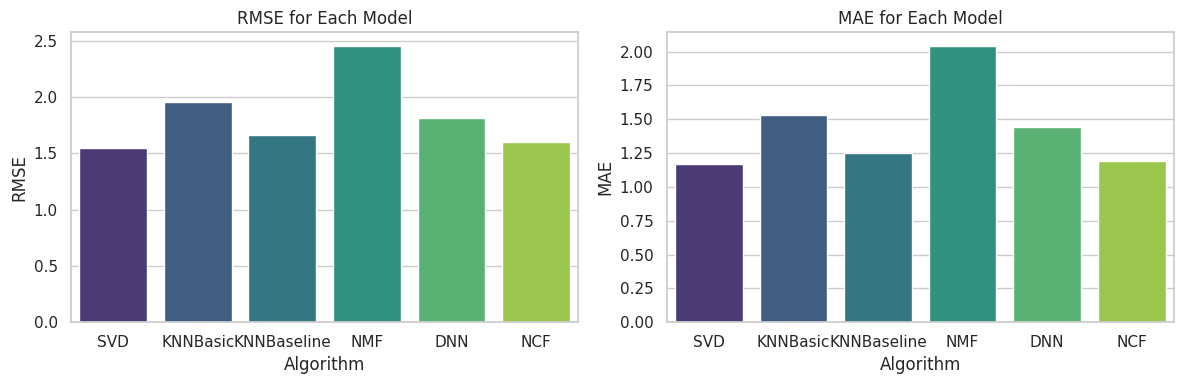

In [101]:
# surprize 모델링 (행렬분해기법(SVD), collaborative filtering(KNNBasic, KNNBaseline), NMF)
# 딥러닝 계열 모델링 (DNN, NCF)
# Set the style of the visualization
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1,2,figsize = (12,4), sharey=False)

# Bar plot for RMSE
sns.barplot(x='Algorithm', y='RMSE', data=results_df, palette='viridis', ax = axes[0])
axes[0].set_title('RMSE for Each Model')
axes[0].tick_params(axis='x', rotation=0)

# Bar plot for MAE
sns.barplot(x='Algorithm', y='MAE', data = results_df, palette='viridis', ax = axes[1])
axes[1].set_title("MAE for Each Model")
axes[1].tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

# RMSE, MAE를 보면 머신러닝 기반의 에러가 더 낮음 특히 Gradient Boosting
# 피처의 퀄리티에 영향을 많이 받는다.

## Note

- Feature 기반의 모델이 성능이 좋으나 항상 Feature 정보가 있는 것은 아님
- Feature Quality에 의해 성능이 크게 영향을 받는다.(ex. 장애 및 수집오류로 인한 이슈)
- 상황에 맞춰 두 방향성을 모두 고려하여 최적화하여 이용하는 것이 필요.(ML모델의 보안으로 cf, mf이용 등)

## 복습
1. cf (Collaborative Filtering) : 협업 필터링은 사용자와 아이템 간의 상호작용을 기반으로 추천을 생성하는 방법. 즉, 다른 사용자들이 특정 아이템에 대해 어떻게 평가했는지를 분석하여 추천을 제공.

- User-Based CF: 비슷한 취향을 가진 사용자들끼리의 평점을 기반으로 추천. 예를 들어, A와 B가 비슷한 영화 평점을 주었다면, A가 좋아한 영화를 B에게 추천.
- Item-Based CF: 아이템 간의 유사성을 기반으로 추천. 예를 들어, 사용자가 특정 영화를 좋아했다면, 그 영화와 비슷한 평점을 받은 다른 영화를 추천.

2. mf (Matrix Factorization) : 행렬 분해는 사용자-아이템 상호작용 행렬을 분해하여 잠재 요인(latent factors)을 추출하는 방법. 이 방법은 추천 시스템에서 매우 효과적이며, 일반적으로 사용자의 선호도와 아이템의 특성을 동시에 모델링.

- SVD (Singular Value Decomposition): 사용자-아이템 행렬을 분해하여 저차원 행렬로 표현. 이를 통해 각 사용자의 선호도와 각 아이템의 특성을 파악.

In [102]:
models

{'Linear Regression': LinearRegression(),
 'Ridge': Ridge(),
 'ElasticNet': ElasticNet(),
 'Random Forest': RandomForestRegressor(random_state=42),
 'Gradient Boosting': GradientBoostingRegressor(random_state=42),
 'ExtraTreesRegressor': ExtraTreesRegressor()}

In [103]:
# Precision의 k 와 recall 순서를 고려한 지표
# 어떤 지표를 봐도 상관없다 그때그때 다르다.. precision, recall,MAE, RMSE..
# Dictionary to store models and their predictions
models_predictions = {}

# Evaluate models and get hit ratios
top_n_values = [1,2,3,4,5,6,7]
ml_precision_results=[]
ml_recall_results = []
threshold = 7

for model_name, model in models.items():
    print(f'Evaluating {model_name}...')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    models_predictions[model_name] = {
        'model' : model,
        'predictions' : y_pred
    }

    # Get precision for different Top-N values
    for top_n in top_n_values:
        ml_precision, ml_recall = get_precision_recall_from_testdata(strat_test_set, top_n, threshold, y_pred)
        ml_precision_results.append({'model':model_name, 'topk':top_n, 'precision':ml_precision})
        ml_recall_results.append({'model':model_name, 'topk':top_n, 'recall':ml_recall})

Evaluating Linear Regression...
Evaluating Ridge...
Evaluating ElasticNet...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating ExtraTreesRegressor...


In [104]:
ml_precision_results = pd.DataFrame(ml_precision_results)
ml_precision_results.head()

model  topk  precision
0  Linear Regression     1   0.249065
1  Linear Regression     2   0.348131
2  Linear Regression     3   0.422897
3  Linear Regression     4   0.482009
4  Linear Regression     5   0.537290

In [105]:
ml_recall_results = pd.DataFrame(ml_recall_results)
ml_recall_results.head()

model  topk    recall
0  Linear Regression     1  0.028012
1  Linear Regression     2  0.074123
2  Linear Regression     3  0.130424
3  Linear Regression     4  0.197799
4  Linear Regression     5  0.277609

In [106]:
# precision 값이 높은게 좋아. topk가 5일때 Random Forest 좋아
ml_precision_results.pivot_table(index='model', columns='topk',values='precision').round(3)

topk                     1      2      3      4      5      6      7
model                                                               
ElasticNet           0.244  0.347  0.419  0.482  0.536  0.587  0.633
ExtraTreesRegressor  0.338  0.397  0.451  0.495  0.545  0.592  0.633
Gradient Boosting    0.270  0.364  0.433  0.494  0.546  0.595  0.640
Linear Regression    0.249  0.348  0.423  0.482  0.537  0.586  0.631
Random Forest        0.341  0.400  0.457  0.500  0.551  0.594  0.638
Ridge                0.249  0.348  0.423  0.482  0.537  0.586  0.631

In [107]:
# 다 비슷비슷
ml_recall_results.pivot_table(index='model', columns='topk',values='recall').round(3)

topk                     1      2      3      4      5      6      7
model                                                               
ElasticNet           0.027  0.074  0.130  0.199  0.277  0.364  0.454
ExtraTreesRegressor  0.033  0.078  0.133  0.196  0.273  0.360  0.450
Gradient Boosting    0.030  0.076  0.132  0.201  0.280  0.366  0.457
Linear Regression    0.028  0.074  0.130  0.198  0.278  0.364  0.454
Random Forest        0.033  0.079  0.134  0.197  0.276  0.361  0.453
Ridge                0.028  0.074  0.130  0.198  0.278  0.364  0.454

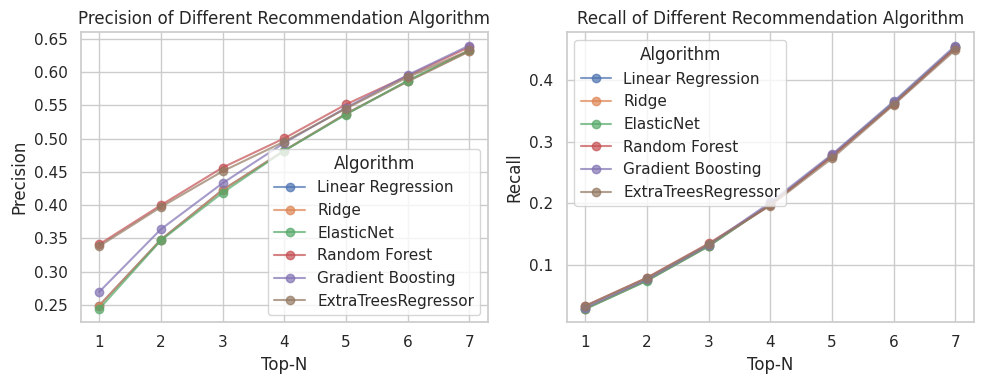

In [108]:
# Create subplots 머신러닝 기반
fig, axes = plt.subplots(1,2, figsize =(10,4))

# Plot precision for each algorithm
for algorithm in ml_precision_results['model'].unique():
    subset = ml_precision_results[ml_precision_results['model']==algorithm]
    axes[0].plot(subset['topk'], subset['precision'], marker='o', label = algorithm, alpha=.7)
    axes[0].set_title('Precision of Different Recommendation Algorithm')
    axes[0].set_xlabel('Top-N')
    axes[0].set_ylabel('Precision')
    axes[0].legend(title='Algorithm')
    axes[0].grid(True)

# Plot recall for each algorithm
for algorithm in ml_recall_results['model'].unique():
    subset = ml_recall_results[ml_recall_results['model']==algorithm]
    axes[1].plot(subset['topk'], subset['recall'], marker='o', label = algorithm, alpha = .7)
    axes[1].set_title('Recall of Different Recommendation Algorithm')
    axes[1].set_xlabel('Top-N')
    axes[1].set_ylabel('Recall')
    axes[1].legend(title='Algorithm')
    axes[1].grid(True)

plt.tight_layout()
plt.show()

# top 1,2,3에서 엑스트라트리가 높은 성능
# recall은 다 비슷하

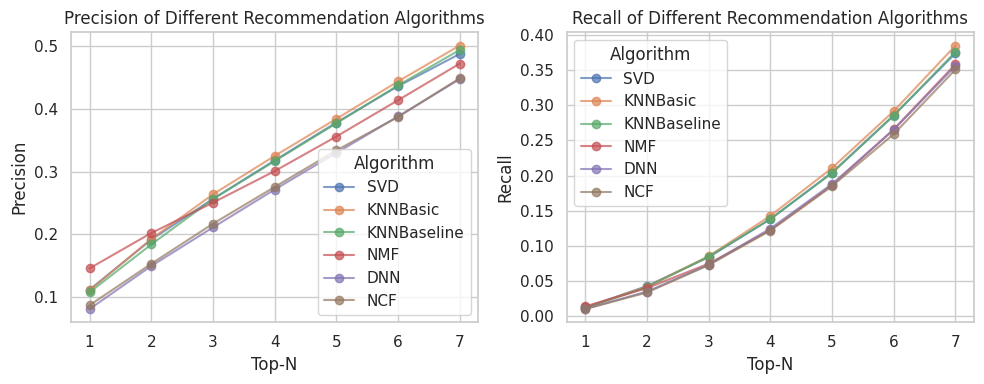

In [109]:
# Create subplots, surprise 라이브러리 기반
fig, axes = plt.subplots(1,2,figsize=(10,4))

# Plot precision for each algorithm
for algorithm in precision_results['model'].unique():
    subset = precision_results[precision_results['model']==algorithm]
    axes[0].plot(subset['topk'], subset['precision'], marker='o', label = algorithm, alpha = .7)
    axes[0].set_title('Precision of Different Recommendation Algorithms')
    axes[0].set_xlabel('Top-N')
    axes[0].set_ylabel('Precision')
    axes[0].legend(title='Algorithm')
    axes[0].grid(True)

# plot Recall for each algorithm
for algorithm in recall_results['model'].unique():
    subset = recall_results[recall_results['model']==algorithm]
    axes[1].plot(subset['topk'], subset['recall'], marker='o', label = algorithm, alpha=.7)
    axes[1].set_title('Recall of Different Recommendation Algorithms')
    axes[1].set_xlabel('Top-N')
    axes[1].set_ylabel('Recall')
    axes[1].legend(title='Algorithm')
    axes[1].grid(True)

plt.tight_layout()
plt.show()

# precision, top5기준으로 보면 전체적으로 0.4 아래. 하지만 머신러닝은 0.5
# 따라서 머신러닝 좋아

# recall, 서프라이즈 기반은 0.2쯤. 머신러닝 0.3에 못 미침.
# 따라서 머신러닝 기반이 더 좋다.

정리하자면
피쳐를 활용한 머신러닝(Gradient boosting이나 랜덤포레스트)이 성능이 좋다.



Problem
30번 이상 리뷰 했던사람만 이용했다. 그럼 그 이하는?
아니면 아예 새로운 유저는 어떻게 추천해줘야한가?

# Content-Based Filtering & Popularity
- 이전 추천알고리즘과 목적이 다르다.
- 이전에 했던 방법들을 사용하지 못할때(새로운 유저, 아이템에 대해 추천할 내용이 없는 경우 Cold Start)
- Content-Based Filtering과 Popularity-based 추천을 통해 해

# Content-based filtering
- 유저가 과거에 혹은 최근에 선호했던 아이템의 특성을 기반으로 비슷한 특성의 새로운 아이템을 추천
  - 1) 유저가 선호하는 아이템을 정의하고(과거에 한번이라도 설문이라도 했다면)
  - 2) 해당 아이템과 유사한 다른 아이템을 찾아서 추천(유사도 높은순)
- 아이템 별로 임베딩(벡터)을 진행 후 모든 아이템 x 아이템 쌍별로 코사인 유사도를 이용해 유사도 기준으로 가능
- 개인화된 추천 아이템을 제공하나, 유사한 아이템이 중복적으로 추천되므로 새로운 아이템(Novelty, Serendipity)이 부족할수 있음
- 따라서 단독 모델로 쓰이기보다, 보완용 혹은 하이브리드용으로 사용

# Popularity-based 추천
- 베스트셀러, 빌보드100 같은 비개인화된 추천, 가장 많이 팔린 아이템. 평점이 높은 아이템 순 정렬 하여 누구에게나 동일하게 추천
- 개인화 반영되지 않아 성능이나 사용자 피드백이 좋지 않은 경향. 사용하지 않는 추세

In [110]:
# summary 텍스트를 이용한 Content-based filtering
# nltk 형태소 분석기
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords # 불용어. ex) 콤마, in 등 
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer # 인코딩방식(인베딩) 자주등장하는 중요한단어에 가중치를 주는 방식
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel # 두가지 용도는같다.

In [111]:
df.head(2)

user_id      age        isbn  rating    book_title           book_author  \
0        8  34.7439  0002005018     5.0  Clara Callan  Richard Bruce Wright   
1    11676  34.7439  0002005018     8.0  Clara Callan  Richard Bruce Wright   

   year_of_publication  \
0               2001.0   
1               2001.0   

                                                                                                            summary  \
0  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   
1  In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.   

    category  age_range  
0  Actresses         30  
1  Actresses         30

In [112]:
# book selection
book_rec = book_info[(book_info['rating_count']>=3) & (book_info['rating_mean']>=4)]

# summary added
book_rec = book_rec.merge(df[['isbn','summary']].drop_duplicates(), on='isbn', how='left').fillna("")

In [113]:
book_rec.head()

isbn                                       book_title  \
0  0316666343                        The Lovely Bones: A Novel   
1  0971880107                                      Wild Animus   
2  0385504209                                The Da Vinci Code   
3  0312195516              The Red Tent (Bestselling Backlist)   
4  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel   

   year_of_publication    book_author category  rating_mean  rating_count  \
0               2002.0   Alice Sebold              8.185290           707   
1               2004.0   Rich Shapero  Fiction     4.390706           581   
2               2003.0      Dan Brown  Fiction     8.435318           487   
3               1998.0  Anita Diamant  Fiction     8.182768           383   
4               1997.0  Rebecca Wells  Fiction     7.887500           320   

                                                                                                                                                                                                                                    summary  
0                                                                                                                                                                                                                                            
1                                                                                                                             Wild animus is a search for the primordial, a test of human\nfoundations and a journey to the breaking point.  
2  Harvard symbologist Robert Langdon and French cryptologist Sophie\nNeveu work to solve the murder of an elderly curator of the Louvre, a\ncase which leads to clues hidden in the works of Da Vinci and a\ncenturies-old secret society.  
3         Told in Dinah&#39;s voice, this novel reveals the traditions and\nturmoils of ancient womanhood--the world of the red tent. It begins\nwith the story of her mothers--Leah, Rachel, Zilpah, and Bilhah--the\nfour wives of Jacob.  
4                                                                                                                                                                          A NOVEL ABOUT THE COMPLEX BONDS BETWEEN A MOTHER AND A DAUGHTER.

In [114]:
# Function to clean and extract meaningful keywords
# . , \ 등 불필요한 것 제거
def clean_text(summary): # 문자열 하나하나에 대해 작동함 따라서 .apply(clean_text)를 사용하여 데이터프레임의 특정 열에 있는 각 요소에 함수를 개별적으로 적용한다. 데이터프레임의 열은 시리즈(Series) 형태임
    # Remove punctuation, numbers, and special characters using regex
    cleaned_summary = re.sub(r'[^a-zA-Z\s]', '', summary)

    # Tokenize the summary by splitting on whitespace
    words = cleaned_summary.lower().split() # 소문자화

    # Filter out stopwords and short words (less than 3 characters)
    meaningful_words = [word for word in words if word not in stop_words and len(word) > 2] # 하나만 있으면 의미가 없으니 3개부터

    return ' '.join(meaningful_words) # Return as a single string

In [115]:
# Apply the cleaning function to the 'summary' column
book_rec['cleaned_summary'] = book_rec['summary'].apply(clean_text)
book_rec['keywords'] = book_rec['book_title']+' '+book_rec['book_author']+' '+book_rec['cleaned_summary']+' '+book_rec['category']

book_rec = book_rec[['isbn', 'book_title', 'keywords']]
book_rec['keywords'] = book_rec['keywords'].apply(clean_text)

In [116]:
book_rec.head(2)

isbn                 book_title  \
0  0316666343  The Lovely Bones: A Novel   
1  0971880107                Wild Animus   

                                                                                                       keywords  
0                                                                               lovely bones novel alice sebold  
1  wild animus rich shapero wild animus search primordial test human foundations journey breaking point fiction

In [117]:
book_rec.shape
# (행의개수, 열의개수)
# 연산이 행의개수 * 행의개수라서 많을수록 오래걸림. 좀 필터링 해서 줄여주는게 좋다.

(27772, 3)

In [118]:
# 피쳐개수, min_df = 10번 이상 나타난것만
tfidf = TfidfVectorizer(stop_words = 'english', max_features=1000,min_df=10)
tfidf_matrix = tfidf.fit_transform(book_rec['keywords'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [119]:
# 컬럼 1000개
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 196080 stored elements and shape (27772, 1000)>

In [120]:
# 행렬. 자기와 자기끼리의 코사인 유사도는 당연히 1
# 1에 가까울수록 유사하다.
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.00881012, ..., 0.        , 0.        ,
        0.00816015],
       [0.        , 0.00881012, 1.        , ..., 0.        , 0.        ,
        0.00689888],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00816015, 0.00689888, ..., 0.        , 0.        ,
        1.        ]])

In [121]:
# 기준아이템 0385504209, 059035342X, 0345370775, 0345337662, 0345339681
# 유사 키워드끼리 묶임

# 최근 유저가 좋아한게 my_isbn이라 가정
my_isbn = '0345370775' # 추천기준 아이템
top_n = 10

idx = book_rec[book_rec['isbn']==my_isbn].index[0]
sim_scores = list(enumerate(cosine_sim[idx]))

# 유사도 높은순 정렬. 본인끼리뿐만 아니라 다른 책과도 유사도 1이 뜨면
# 시리얼번호만 다르고 같은 책.
sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True)

# 본인을 제외한 10개까지 추천
sim_scores = sim_scores[1:top_n+1]
book_indices = [i[0] for i in sim_scores]
book_rec.iloc[book_indices]

isbn              book_title  \
3131   3426600218  Dinopark/Jurassic Park   
148    034540288X          The Lost World   
26864  067945540X              Lost World   
6364   0394588169           Jurassic Park   
234    0345391055              Disclosure   
1050   044661162X        Chasing the Dime   
3403   0451202538                 Hangman   
6375   0451195663           Primal Scream   
7256   0451199693             Burnt Bones   
8072   3442451221                Timeline   

                                                                                                                                                                                        keywords  
3131                                                                                                                                                      dinoparkjurassic park michael crichton  
148     lost world michael crichton six years secret disaster jurassic park destruction dinosaurs dismantling park closing island rumors persist form life survived sequel jurassic park fiction  
26864                        lost world michael crichton six years secret disaster jurassic park destruction dinosaurs dismantling park closing island rumors persist form life survived fiction  
6364   jurassic park michael crichton american bioengineering research firm erects theme park caribbean island complete living dinosaurs invites group scientists first terrified guests fiction  
234                                                                                                                                                                  disclosure michael crichton  
1050                                                                                                                                                               chasing dime michael connelly  
3403                                                                                                                                                                       hangman michael slade  
6375                                                                                                                                                                 primal scream michael slade  
7256                                                                                                                                                                   burnt bones michael slade  
8072                                                                                                                                                                   timeline michael crichton

In [122]:
book_rec[book_rec['isbn']==my_isbn]

isbn     book_title                        keywords
28  0345370775  Jurassic Park  jurassic park michael crichton

In [123]:
# 함수화
my_isbn = '3426600218'
top_n = 10

# True : 기준 포함
# False : 기준 미포함
def get_recom_items(my_isbn, top_n, cosine_sim, book_rec, std_book_include = True):

    idx = book_rec[book_rec['isbn'] == my_isbn].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True)
    if std_book_include:
        sim_scores = sim_scores[:top_n+1]
    else:
        sim_scores = sim_scores[1:top_n+1]
    book_indices = [i[0] for i in sim_scores]

    return book_rec.iloc[book_indices]

In [124]:
recom_result = get_recom_items(my_isbn, top_n, cosine_sim, book_rec, std_book_include = True)
recom_result

isbn              book_title  \
28     0345370775           Jurassic Park   
3131   3426600218  Dinopark/Jurassic Park   
148    034540288X          The Lost World   
26864  067945540X              Lost World   
6364   0394588169           Jurassic Park   
234    0345391055              Disclosure   
1050   044661162X        Chasing the Dime   
3403   0451202538                 Hangman   
6375   0451195663           Primal Scream   
7256   0451199693             Burnt Bones   
8072   3442451221                Timeline   

                                                                                                                                                                                        keywords  
28                                                                                                                                                                jurassic park michael crichton  
3131                                                                                                                                                      dinoparkjurassic park michael crichton  
148     lost world michael crichton six years secret disaster jurassic park destruction dinosaurs dismantling park closing island rumors persist form life survived sequel jurassic park fiction  
26864                        lost world michael crichton six years secret disaster jurassic park destruction dinosaurs dismantling park closing island rumors persist form life survived fiction  
6364   jurassic park michael crichton american bioengineering research firm erects theme park caribbean island complete living dinosaurs invites group scientists first terrified guests fiction  
234                                                                                                                                                                  disclosure michael crichton  
1050                                                                                                                                                               chasing dime michael connelly  
3403                                                                                                                                                                       hangman michael slade  
6375                                                                                                                                                                 primal scream michael slade  
7256                                                                                                                                                                   burnt bones michael slade  
8072                                                                                                                                                                   timeline michael crichton

- Note
  - 보통 유저별 최근 구매 아이템중에 빈도가 많거나 평가 좋은 아이템을 기준으로 이용
  - 없는경우, 자주 클릭한 아이템을 이용하거나 세그먼트별 대표아이템을 대안으로 이용
  - 그래도 없으면 회원가입시 간단한 설문조사로 파악(e.g. Netflix)

In [125]:
# Popularity Recommendation, but NON-personalized
category_list = book_info.groupby(['category']).size()
category_list.sort_values(ascending = False)[:10]

category
Fiction                      33009
Juvenile Fiction              5816
Biography & Autobiography     3318
History                       1927
Religion                      1823
Juvenile Nonfiction           1418
Social Science                1233
Humor                         1165
Body, Mind & Spirit           1109
Business & Economics          1071
dtype: int64

In [126]:
# Content-based & Popularity Hybrid
user_id = 222054
top_n = 10

def get_recommended_items_content(user_id, top_n):

    # the previous book that the user liked the most 래이팅높은
    most_liked_isbn = df_mf[df_mf['user_id']==user_id].sort_values('rating', ascending=False)['isbn']
    if most_liked_isbn.empty:
        return pd.DataFrame()
    most_liked_isbn = most_liked_isbn.values[0] # get the isbm

    # popularity-based if none
    if most_liked_isbn not in book_rec['isbn'].values: # 없으면 popularity-based사용
        # 메타정보에서 제일 많이 
        predictions = book_info.sort_values('rating_count', ascending=False)[:top_n]
        predictions['user_id'] = user_id
        predictions = predictions[['user_id', 'isbn', 'book_title', 'book_author']]

    # using content-based
    else:
        idx = book_rec[book_rec['isbn']==most_liked_isbn].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)[1:top_n+1]
        book_indices = [i[0] for i in sim_scores]
        recommend_books = book_rec.iloc[book_indices]['isbn']
        predictions = book_info[book_info['isbn'].isin(recommend_books)]
        predictions['user_id'] = user_id
        predictions = predictions[['user id','isbn', 'book_title', 'book_author']]

    return predictions

get_recommended_items_content(user_id, top_n)

user_id        isbn  \
203    222054  0316666343   
22     222054  0971880107   
1017   222054  0385504209   
701    222054  0312195516   
1358   222054  0060928336   
2633   222054  059035342X   
307    222054  0142001740   
957    222054  0446672211   
233    222054  044023722X   
248    222054  0452282152   

                                                            book_title  \
203                                          The Lovely Bones: A Novel   
22                                                         Wild Animus   
1017                                                 The Da Vinci Code   
701                                The Red Tent (Bestselling Backlist)   
1358                   Divine Secrets of the Ya-Ya Sisterhood: A Novel   
2633  Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))   
307                                            The Secret Life of Bees   
957                 Where the Heart Is (Oprah's Book Club (Paperback))   
233                                                    A Painted House   
248                                          Girl with a Pearl Earring   

          book_author  
203      Alice Sebold  
22       Rich Shapero  
1017        Dan Brown  
701     Anita Diamant  
1358    Rebecca Wells  
2633    J. K. Rowling  
307     Sue Monk Kidd  
957      Billie Letts  
233      John Grisham  
248   Tracy Chevalier

# 최종 추천모델 클래스 구성
- 알고리즘 중 일부를 선정해 하나의 추천 클래스 구성
- 클래스 하나에 Matrix Factorization(SVD), Machine Learning(GBR), Content+Popularity(Cold Start해결을 위한) 추천을 생성하는 코드
- 실제 서비스에는 클래스를 주로 이용, 클래스간 상속하는 방식으로 코드 구성하여 배포하는 경우가 대부분
- 클래스 사용하는 이유 : 인스턴스 여러번 찍어내야함

# SVD Recommender

In [127]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD
from sklearn.ensemble import GradientBoostingRegressor
class SVDRecommender:
    def __init__(self, df_mf):
        self.df_mf = df_mf
        self.svd_model = self.fit_svd_model()

    def fit_svd_model(self):
        # Preprocessing
        df_mf = self.df_mf[['user_id', 'isbn', 'rating']].drop_duplicates()
        user_list = df_mf.groupby('user_id').size().reset_index(name='review_cnt')
        user_list = user_list[user_list['review_cnt'] >= 30]

        df_mf = df_mf[df_mf['user_id'].isin(user_list['user_id'])]

        # Ensure reader is defined (surprise용)
        reader = Reader(rating_scale = (1,5)) # Adjust scale as needed

        # Train
        train_data = Dataset.load_from_df(df_mf[['user_id','isbn','rating']], reader)
        trainset = train_data.build_full_trainset()
        svd = SVD()
        svd.fit(trainset)

        return svd

# GBR(Gradient boosting Regressor) Recommender

In [128]:
# def는 그냥 아래로 쭉 가면 되지만.. Class는 위아래 좀 복잡할수도

class GBRRecommender:
    def __init__(self, ml_train_set, book_info, user_info):
        self.ml_train_set = ml_train_set
        self.book_info = book_info
        self.user_info = user_info
        self.gbr_model = self.fit_gbr_model()

    def fit_gbr_model(self):
        # Prepare data for GBR fitting
        df_mf = self.preprocessing(self.ml_train_set)

        # Train
        X_train, y_train = self.split_data(df_mf)
        gbr_model = GradientBoostingRegressor(random_state=42)
        gbr_model.fit(X_train, y_train)
        
        return gbr_model

    def preprocessing(self, df):
        df_mf = df[['user_id', 'isbn', 'rating']].drop_duplicates()
        user_list = df_mf.groupby("user_id").size().reset_index(name='review_cnt')
        user_list = user_list[user_list['review_cnt'] >= 30]

        df_mf = df_mf[df_mf['user_id'].isin(user_list['user_id'])]
        
        merged_df = df_mf.merge(self.book_info, on='isbn')\
                          .merge(self.user_info[['user_id', 'age']].drop_duplicates(), on='user_id')
        return self.encode_categorical_columns(merged_df)

    # 텍스트 숫자로 인코딩
    def encode_categorical_columns(self, df):
        """Encode categorical columns in the DataFrame."""
        categorical_columns = ['isbn', 'book_author', 'category']
        for column in categorical_columns:
            df[f'{column}_encoded'] = df[column].astype('category').cat.codes
        return df

    def split_data(self, df):
       
        features = ['age', 'isbn_encoded', 'book_author_encoded', 'year_of_publication',
                    'rating_mean', 'rating_count', 'category_encoded']

        # Check if all features exist in the DataFrame
        missing_features = [feature for feature in features if feature not in df.columns]
        if missing_features:
            print(f"Missing features: {missing_features}")
            raise KeyError(f"None of {missing_features} are in the input DataFrame")

        X = df[features]
        y = df['rating']
        return X, y

# Final Book Recommender with SVD, GBR, Content&Popularity
-SVD Recommender와 GBR Recommender 클래스를 상속받아 Book Recommender 에서는 3개의 알고리즘을 이용해 추천셋 생성

In [129]:
class BookRecommender(SVDRecommender, GBRRecommender):
    
    def __init__(self, df_mf, book_info, book_rec, ml_train_set, cosine_sim):
        SVDRecommender.__init__(self, df_mf)
        GBRRecommender.__init__(self, ml_train_set, book_info, ml_train_set[['user_id', 'age']].drop_duplicates())

        self.book_info = book_info
        self.book_rec = book_rec
        self.cosine_sim = cosine_sim

    def get_recommended_items_mf(self, user_id, top_n):
        """Matrix Factorization based recommendations"""
        user_reviewed_iid = self.df_mf[self.df_mf['user_id'] == user_id]['isbn']
        iid_to_est = self.df_mf[~self.df_mf['isbn'].isin(user_reviewed_iid)]['isbn'].drop_duplicates()
        testset = [(user_id, iid, None) for iid in iid_to_est]

        predictions = self.svd_model.test(testset)
        predictions = pd.DataFrame(predictions)[['uid', 'iid', 'est']]
        predictions.columns = ['user_id', 'isbn', 'predicted_rating']
        predictions['predicted_rank'] = predictions['predicted_rating'].rank(method='first', ascending=False)
        predictions = predictions.sort_values("predicted_rank")[:top_n]
        predictions = predictions.merge(self.book_info, on='isbn')

        return predictions[['user_id', 'isbn', 'book_title', 'book_author']]

    def get_recommended_items_ml(self, user_id, top_n):
        """Machine Learning (GBR) based recommendations"""
        user_reviewed_iid = self.df_mf[self.df_mf['user_id'] == user_id]['isbn']
        iid_to_est = self.df_mf[~self.df_mf['isbn'].isin(user_reviewed_iid)]['isbn'].drop_duplicates()
        ml_test_set = self.ml_train_set[self.ml_train_set['isbn'].isin(iid_to_est)]
        # 나이 피쳐
        user_age = self.ml_train_set[self.ml_train_set['user_id'] == user_id]['age'].unique()

        features = ['age', 'isbn_encoded', 'book_author_encoded', 'year_of_publication',
                    'rating_mean', 'rating_count', 'category_encoded']

        # 해당 연령만
        X = ml_test_set[features].query("age == @user_age")
        y_pred = self.gbr_model.predict(X)

        gbr_rec_result = X.copy()
        gbr_rec_result['y_pred'] = y_pred
        # pred기준 sorting
        gbr_rec_result = gbr_rec_result.sort_values("y_pred", ascending=False)[:top_n]
        # meta정보 붙힘
        gbr_rec_result = gbr_rec_result.merge(self.ml_train_set[['isbn_encoded', 'isbn', 'book_title', 'book_author']].drop_duplicates(), on='isbn_encoded')
        gbr_rec_result = gbr_rec_result[['isbn', 'book_title', 'book_author']]
        gbr_rec_result['user_id'] = user_id
        gbr_rec_result = gbr_rec_result.reindex(columns=['user_id', 'isbn', 'book_title', 'book_author'])

        return gbr_rec_result
    
    def get_recommended_items_content(self, user_id, top_n):
        """ Content-based recommendations """
        most_liked_isbn = self.df_mf[self.df_mf['user_id'] == user_id].sort_values("rating", ascending=False)['isbn']
        
        if most_liked_isbn.empty:
            return pd.DataFrame()  # Return empty DataFrame if user has no ratings
        
        most_liked_isbn = most_liked_isbn.values[0]
        
        if most_liked_isbn not in self.book_rec['isbn'].values:
            predictions = self.book_info.sort_values("rating_count", ascending=False)[:top_n]
            predictions['user_id'] = user_id
            return predictions[['user_id', 'isbn', 'book_title', 'book_author']]
        else: # most_liked_isbn 있으면
            idx = self.book_rec[self.book_rec['isbn'] == most_liked_isbn].index[0]
            sim_scores = list(enumerate(self.cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
            book_indices = [i[0] for i in sim_scores]
            recommend_books = self.book_rec.iloc[book_indices]['isbn']
            predictions = self.book_info[self.book_info['isbn'].isin(recommend_books)]
            predictions['user_id'] = user_id
            return predictions[['user_id', 'isbn', 'book_title', 'book_author']]    


book_recommender = BookRecommender(df_mf, book_info, book_rec, strat_train_set, cosine_sim)

In [130]:
# 랜덤하게 user_ids
unique_user_ids = df_mf['user_id'].unique()
np.random.shuffle(unique_user_ids)
print(unique_user_ids[:20])

[134837 234281  59269  99720 163202 147686 275970 190885 151098  90198
  94242 113904 116122 208147  68383 270713 110373 117384 190923 222296]


In [131]:
user_id = 41589
top_n = 10

# matrix factorization (SVD)기준
mf_rec_result = book_recommender.get_recommended_items_mf(user_id, top_n)
mf_rec_result

user_id        isbn  \
0    41589  0002005018   
1    41589  0374157065   
2    41589  0399135782   
3    41589  0425176428   
4    41589  0671870432   
5    41589  1881320189   
6    41589  0440234743   
7    41589  0452264464   
8    41589  0609804618   
9    41589  1841721522   

                                                                                           book_title  \
0                                                                                        Clara Callan   
1  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It   
2                                                                              The Kitchen God's Wife   
3                     What If?: The World's Foremost Military Historians Imagine What Might Have Been   
4                                                                                     PLEADING GUILTY   
5                                                                       Goodbye to the Buttermilk Sky   
6                                                                                       The Testament   
7                                                                Beloved (Plume Contemporary Fiction)   
8       Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source   
9                                       New Vegetarian: Bold and Beautiful Recipes for Every Occasion   

            book_author  
0  Richard Bruce Wright  
1      Gina Bari Kolata  
2               Amy Tan  
3         Robert Cowley  
4           Scott Turow  
5          Julia Oliver  
6          John Grisham  
7         Toni Morrison  
8             The Onion  
9    Celia Brooks Brown

In [132]:
# ML 기반
ml_rec_result = book_recommender.get_recommended_items_ml(user_id, top_n)
ml_rec_result

user_id        isbn  \
0    41589  039483609X   
1    41589  157344166X   
2    41589  0553568817   
3    41589  0345278666   
4    41589  0517583569   
5    41589  0517575337   
6    41589  0670887269   
7    41589  0895773759   
8    41589  0767910036   
9    41589  0394906012   

                                                               book_title  \
0                      The Black Stallion-Pa (Black Stallion (Paperback))   
1                 Real Live Nude Girl: Chronicles of Sex-Positive Culture   
2                                              The Fannie Farmer Cookbook   
3                                Desert Solitaire a Season In the Wildern   
4                                               The Little Grain Cookbook   
5        Heartland: The Best of the Old and the New from Midwest Kitchens   
6                                                               Pug Shots   
7                                                      ABC's of the Bible   
8  Learning to Float : The Journey of a Woman, a Dog, and Just Enough Men   
9                                                      The Black Stallion   

         book_author  
0      Walter Farley  
1        Carol Queen  
2  Marion Cunningham  
3       Edward Abbey  
4   Patricia Stapley  
5       Marcia Adams  
6      Jim Dratfield  
7    Reader's Digest  
8        LILI WRIGHT  
9      WALTER FARLEY

In [133]:
# content 기반
content_rec_result = book_recommender.get_recommended_items_content(user_id, top_n)
content_rec_result

user_id        isbn                                  book_title  \
31820    41589  0743407075                                Grand Avenue   
65270    41589  050552337X                           Rejar (Timeswept)   
13339    41589  0446364819                                  Stork Club   
13374    41589  0743442652                      The Pink Magnolia Club   
8062     41589  3442430879                        Schau Dich nicht um.   
22282    41589  0749399570                           The Joy Luck Club   
1046     41589  067972768X  The Joy Luck Club (Vintage Contemporaries)   
13418    41589  9871106181                               El Club Dumas   
59436    41589  0330348337                    Snakebite Survivors Club   
34036    41589  8420481025         El Club Dumas (Alfaguara Hispanica)   

                book_author  
31820          Joy Fielding  
65270              Dara Joy  
13339      Iris Ranier Dart  
13374        Geralyn Dawson  
8062           Joy Fielding  
22282               Amy Tan  
1046                Amy Tan  
13418  Arturo Perez-Reverte  
59436           Jeremy Seal  
34036  Arturo Perez-Reverte